#**Data Understanding**
###Daniela Puerta

In [29]:
# Importing Libraries
import os # for managing files
import re # for RegEx
import nltk # for natural language
from nltk.corpus import stopwords # for stopwords
import numpy as np # for arrays
import pandas as pd # for dataframes
import statistics as stat # for statistics
import seaborn as sns # for plots
import matplotlib.pyplot as plt #for plots
from scipy import stats # for hypothesis testing

##**Data Sources**

In [5]:
# Data Sources
landing_path ='/content/drive/Othercomputers/My Laptop/SoftkaU/Reto/Landing'
work_path = '/content/drive/Othercomputers/My Laptop/SoftkaU/Reto/Work'
os.chdir(landing_path)
# Getting a list with every file name
text_files = os.listdir(landing_path)
# print(text_files)
# print(len(text_files))

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Creating a string from all the files
raw_text = ''
for text_file in text_files:
  with open(text_file ,'r', encoding='utf-8') as file:
    raw_text += file.read()

## **Data Sampling**

In [8]:
# Sampling
# Opening and reading each file
for name in text_files:
  with open(name,'r', encoding='utf8') as file:
    file =file.read()
    lenght = len(file)
    ten_percent = int(lenght*0.1)
  #print('File Name:',name, '\n', 'Size:', lenght,'\n','Sample:', file[:ten_percent], '\n')

##**Data Cleaning**

In [9]:
# Defining functions 
# Replacing Accents
def replace_accents(unprocessed_text):
  processed_text = re.sub('á','a', unprocessed_text)
  processed_text = re.sub('é','e', processed_text)
  processed_text = re.sub('í','i', processed_text)
  processed_text = re.sub('ó','o', processed_text)
  processed_text = re.sub('ú','u', processed_text)
  processed_text = re.sub('Á','a', processed_text)
  processed_text = re.sub('É','e', processed_text)
  processed_text = re.sub('Í','i', processed_text)
  processed_text = re.sub('Ó','o', processed_text)
  processed_text = re.sub('Ú','u', processed_text)
  return processed_text

In [10]:
# Defining functions
# Deleting Special Characters
def del_special_char(unprocessed_text):
  special_char_pattern = r'[^a-zñA-ZÑ0-9]' # Brings everything but letters and numbers
  processed_text = re.sub(special_char_pattern,' ', unprocessed_text) # Replaces everything but letters and number with a space
  return processed_text

In [11]:
# Defining functions
# Deleting Numbers
def del_numbers(unprocessed_text):
  numbers_pattern = r'\d' # Brings all numbers
  processed_text = re.sub(numbers_pattern, ' ', unprocessed_text ) # Deletes all numbers
  return processed_text

In [12]:
# Defining functions
# Deleting words with 2+ Uppercase
def del_uppercase(list_of_words):
  words_wo_upper = []
  for word in list_of_words:
    count=0
    for char in word:
      if char.isupper():
        count+=1
    if count<=1:
      words_wo_upper.append(word)
  return words_wo_upper

In [13]:
# Defining functions
# Deleting words with 2+ Uppercase using RegEx


In [14]:
# Defining functions
# Delete stopwords
def del_stopwords(list_of_words):
  nltk.download('stopwords')
  stop_words = stopwords.words('spanish')
  stop_words_in_text = [word for word in list_of_words if word in stop_words]
  list_wo_stopwords = [word for word in list_of_words if word not in stop_words]
  return list_wo_stopwords

In [15]:
# Defining functions
# Delete words with lenght <3 characters
def del_words_under_three(list_of_words):
  words_over_three = [word for word in list_of_words if len(word)>3]
  return words_over_three

In [16]:
# Defining functions 
# Delete repeated words
def del_repeated_words(list_of_words):
  array_of_words = np.array(list_of_words) #Converts the list to a numpy array
  unique_words= np.unique(array_of_words)
# Convert back to a list
  unique_words_list = unique_words.tolist()
  return unique_words_list

In [17]:
# Defining function
# Calling all functionds for Data Cleaning
def data_cleaning(raw_text):
  # Replace accents
  text_wo_accents = replace_accents(raw_text)
  # Delete special characters
  text_wo_special_char = del_special_char(text_wo_accents)
  # Convert text into a list
  list_of_words = text_wo_special_char.split()
  # Delete words with 2+ Uppercase
  words_wo_upper = del_uppercase(list_of_words)
  # Convert to lowercase
  words_lowercase = [word.lower() for word in words_wo_upper]
  # Convert to text
  text_lowercase = ' '
  for word in words_lowercase:
    text_lowercase+= ' '+ word
  # Delete numbers
  text_wo_numbers = del_numbers(text_lowercase)
  # Delete stopwords
  list_wo_stopwords = del_stopwords(text_wo_numbers.split())
  # Delete words with lenght <3 characters
  words_over_three = del_words_under_three(list_wo_stopwords)
  # Delete repeated words
  unique_words = del_repeated_words(words_over_three)
  return unique_words

In [18]:
# Data cleaning
# Creating the word bank
word_bank = data_cleaning(raw_text)
print('¡EL banco tiene',len(word_bank), 'palabras!')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


¡EL banco tiene 32430 palabras!


In [19]:
# Saving the word bank as a txt file
# Changing directory to work
os.chdir(work_path)
with open('word_bank_daniela.txt', 'w') as word_bank_daniela:
    for word in word_bank:
        word_bank_daniela.write('%s ' % word)

##**Initial Data Information**

In [20]:
# Get list alphabet, vowels and consonants
alphabet = 'abcdefghijklmnñopqrstuvwxyz'
alphabeth_list = [char for char in alphabet]
vowels = ['a', 'e', 'i','o','u']
consonants = [char for char in alphabeth_list if char not in vowels]
# Lenght raw text
print('El texto crudo tiene aproxiamdamente',len(raw_text.split()),'palabras')
# Lenght word bank
print('El banco tiene',len(word_bank),'palabras')

El texto crudo tiene aproxiamdamente 430020 palabras
El banco tiene 32430 palabras


##**Central Tendency Measures**

In [21]:
# Defining function
# Calculates Central Tendency Measures
def central_tendency_measures(distribution, str):
  if str == 'numeric':
    # Calculate mean
    mean = stat.mean(distribution)
    # Calculate median
    median = stat.median(distribution)
    # Calculate mode
    mode = stat.mode(distribution)
    ctm = {'mean': mean, 'median': median, 'mode':mode}
    return ctm
  else:
    # Calculate median
    median = stat.median(distribution)
    # Calculate mode
    mode = stat.mode(distribution)
    ctm = {'median': median, 'mode':mode}
    return ctm

##**Measures of Position**

In [22]:
# Defining function
# Calculates Measures of Position
def measures_of_position(distribution, str):
  if str == 'numeric':
    # Calculate Q1 
    q1= float(np.percentile(distribution, [25]))
    # Calculate Q2
    q2= float(np.percentile(distribution, [50]))
    # Calculate Q3
    q3= float(np.percentile(distribution, [75]))
    # Calculate percentil 90
    p = 90 #Percentil que se quiera calcular valor entre 0 y 100
    per =np.percentile(distribution, p)
    # Calculate Interquartile Range
    iqr=q3 - q1
    mop = {'q1':q1,'q2':q2,'q3':q3,'per':per,'iqr':iqr}
    return mop
  elif str == 'letter':
    # Calculate Q1 
    q1= float(np.percentile(distribution, [25]))
    # Calculate Q2
    q2= float(np.percentile(distribution, [50]))
    # Calculate Q3
    q3= float(np.percentile(distribution, [75]))
    # Calculate Interquartile Range
    iqr=q3 - q1
    mop = {'q1':q1,'q2':q2,'q3':q3,'iqr':iqr}
    return mop

##**Statistical Dispersion**

In [23]:
# Defining function
# Calculates Statistical Dispersion
def statistical_dispersion(distribution):
    # Calculating range
    range = max(distribution)-min(distribution)
    # Calculating variance
    variance= stat.variance(distribution)
    # Calculating standard deviation
    std_dev = stat.stdev(distribution)
    sd ={'range': range,'variance':variance, 'std_dev':std_dev}
    return sd

##**Data Visualization**


In [24]:
# Defining function
# Boxplot
def boxplot(distribution, str, letter, title, x_label):
  if str == 'numeric':
    boxplot = sns.boxplot(distribution, color='pink')
    boxplot.set_title(f'{title}', fontsize = 11)
    boxplot.set_xlabel(f'{x_label}', fontsize = 9)
    boxplot.minorticks_on()
    plt.show()
  elif str == 'letter':
    boxplot = sns.boxplot(distribution, color='pink')
    boxplot.set_title(f'{title} {letter.upper()}', fontsize = 11)
    boxplot.set_xlabel(f'{x_label}', fontsize = 9)
    boxplot.minorticks_on()
    plt.show()

In [25]:
# Defining function
# Histogram
def histogram(distribution, str, letter, title, x_label):
  if str == 'numeric':
    histogram = sns.histplot(distribution, color='pink', bins=21)
    histogram.set_title(f'{title}', fontsize = 11)
    histogram.set_xlabel(f'{x_label}',fontsize = 9)
    histogram.set_ylabel('FRECUENCIA',fontsize = 9)
    histogram.minorticks_on()   
    plt.show()
  if str == 'letter':
    histogram = sns.histplot(distribution, color='pink', bins = 21)
    histogram.set_title(f'{title} {letter.upper()}', fontsize = 11)
    histogram.set_xlabel(f'{x_label}',fontsize = 9)
    histogram.set_ylabel('FRECUENCIA',fontsize = 9)
    histogram.minorticks_on()   
    plt.show()  

In [26]:
# Defining function
# Kernel density distribution
def KDE(distribution, str,letter, title, x_label):
  if str == 'numeric':
    kde = sns.kdeplot(distribution, color = 'Pink',bw_adjust=2)
    kde.set_title(f'{title}', fontsize = 11)
    kde.set_xlabel(f'{x_label}')
    kde.set_ylabel('DENSIDAD')
    plt.show()
  elif str == 'letter':
    kde = sns.kdeplot(distribution, color = 'Pink', bw_adjust=2)
    kde.set_title(f'{title} {letter.upper()}', fontsize = 11)
    kde.set_xlabel(f'{x_label}')
    kde.set_ylabel('DENSIDAD')
    plt.show()

##**Lenght of the words**

In [27]:
# Getting words lenght
words_lenght = [ len(word) for word in word_bank]

In [28]:
# Getting the lenght of the word per letter in every word
dict_word_lenght_per_letter = dict.fromkeys(alphabeth_list, [])
for letter in alphabeth_list:
  word_lenght_per_letter = []
  for word in word_bank:
    for char in word:
      if letter == char:
        word_lenght_per_letter.append(len(word))
        dict_word_lenght_per_letter[letter] = word_lenght_per_letter
#print(dict_word_lenght_per_letter) 

In [30]:
# Defining function
# Lenght of the word per letter in every word
def word_lenght_per_letter(letter):
  letter_lenght_dist = dict_word_lenght_per_letter[letter]
  return letter_lenght_dist

##**Position of every letter in the word**

In [31]:
# Getting the position every letter
dict_letter_position = dict.fromkeys(alphabeth_list,[])
for letter in alphabeth_list:
  position = []  
  for word in word_bank:
    for pos, char in enumerate(word):
      if letter == char:
        position.append(pos+1)
  dict_letter_position[letter]= position
#print(dict_letter_position)

In [32]:
# Defining function
# Gets a list with the distribution of the postition of the letter
def letter_position_distribution(letter):
    letter_pos_dist = dict_letter_position[letter]
    return letter_pos_dist

In [33]:
# Getting the distribution of the position of all letters as a list
all_letter_position_distribution = []
for letter in alphabeth_list:
  letter_pos_dist = letter_position_distribution(letter)
  all_letter_position_distribution+= letter_pos_dist
#print(all_letter_position_distribution)
#print(len(all_letter_position_distribution))

In [34]:
# Getting Vowels Distribution
vowels_pos_distribution =[]
for vowel in vowels:
  letter_pos_dist = letter_position_distribution(vowel)
  vowels_pos_distribution+= letter_pos_dist
print(len(vowels_pos_distribution))

122652


In [35]:
# Getting Consonants Distribution
consonants_pos_distribution =[]
for consonant in consonants:
  letter_pos_dist = letter_position_distribution(consonant)
  consonants_pos_distribution+= letter_pos_dist
print(len(consonants_pos_distribution))

153085


##**Quantity of vowels and consonants per word**

In [36]:
# Number of vowels per word
number_of_vowels=[]
for word in word_bank:  
  count=0
  for char in word:        
    if char in vowels:
      count+=1        
  number_of_vowels.append(count)

In [37]:
# Number of consonants per word
number_of_consonants=[]
for word in word_bank:  
  count=0
  for char in word:        
    if char in consonants:
      count+=1        
  number_of_consonants.append(count)

##**Analysis**

###Analysis of the lenght of the words

In [38]:
# Calculate central tendency measures for the lenght of the words
lenght_ctm = central_tendency_measures(words_lenght,'numeric')
print(lenght_ctm)

{'mean': 8.502528522972556, 'median': 8.0, 'mode': 8}


In [39]:
# Calculate measures of position for the lenght of the words
lenght_mop = measures_of_position(words_lenght,'numeric')
print(lenght_mop)

{'q1': 7.0, 'q2': 8.0, 'q3': 10.0, 'per': 12.0, 'iqr': 3.0}


In [40]:
# Calculate statistical dispersion for the lenght of the words
lenght_sd = statistical_dispersion(words_lenght)
print(lenght_sd)

{'range': 21, 'variance': 6.78211763116705, 'std_dev': 2.6042499171867224}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


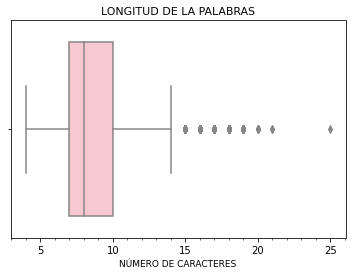

In [41]:
# Boxplot for the lenght of the word
lenght_boxplot = boxplot(words_lenght, 'numeric', None, 'LONGITUD DE LA PALABRAS', 'NÚMERO DE CARACTERES')

In [42]:
# Outliers for the lenght of the word
lenght_limit = lenght_mop['q3'] + (lenght_mop['iqr']*1.5)
lenght_outliers = [x for x in words_lenght if x > lenght_limit]
print(lenght_limit)

14.5


In [43]:
# Frequency table of the lenght of the words
df_lenght = pd.value_counts(words_lenght).to_frame().reset_index()
df_lenght.columns = ['NÚMERO DE CARACTERES','FRECUENCIA']
display(df_lenght)

,NÚMERO DE CARACTERES,FRECUENCIA
0,8,4873
1,7,4686
2,9,4535
3,10,3821
4,6,3687
5,5,2726
6,11,2668
7,12,1769
8,4,1284
9,13,1096


Text(0.5, 1.0, 'FRECUENCIA DE LONGITUD DE LAS PALABRAS')

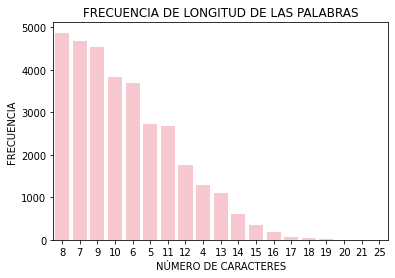

In [44]:
# Bar chart of frequencies of the lenght of the words
lenght_bar = sns.barplot(x ='NÚMERO DE CARACTERES',y ='FRECUENCIA', data = df_lenght , color = 'pink',order = df_lenght['NÚMERO DE CARACTERES'])
lenght_bar.set_title('FRECUENCIA DE LONGITUD DE LAS PALABRAS')

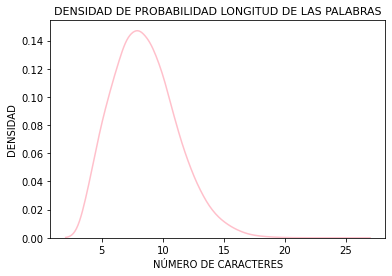

In [45]:
# Kernel density distribution for the lenght of the words
lenght_kde = KDE(words_lenght, 'numeric',None, 'DENSIDAD DE PROBABILIDAD LONGITUD DE LAS PALABRAS', 'NÚMERO DE CARACTERES')

###Analysis all letters

In [46]:
# Frequency Table all letters
letters_count = []
for key, value in dict_letter_position.items():
    count = len([item for item in value if item])
    letters_count.append(count)
# Creating a Data Frame
df_letters_count = pd.DataFrame()
df_letters_count['LETRA'] = alphabeth_list
df_letters_count['FRECUENCIA'] = letters_count
df_letters_count_sorted =df_letters_count.sort_values('FRECUENCIA', ascending = False)
display(df_letters_count_sorted)

,LETRA,FRECUENCIA
0,a,35862
4,e,27468
8,i,26036
15,o,25322
18,r,21340
13,n,20218
19,s,19517
20,t,14964
2,c,14735
3,d,11743


Text(0.5, 1.0, 'FRECUENCIA ABSOLUTA DE LAS LETRAS')

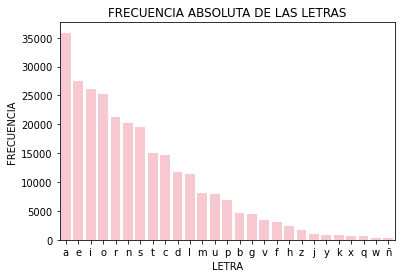

In [47]:
# Bar chart of frequencies of the letters
all_letters_bar = sns.barplot(x ='LETRA',y ='FRECUENCIA', data = df_letters_count_sorted , color = 'pink')
all_letters_bar.set_title('FRECUENCIA ABSOLUTA DE LAS LETRAS')

###Analysis position of each letter

In [48]:
# Defining Function
# Analysis for each letter
def analysis_each_letter(letter):
  # Distribution of the position
  letter_pos_dist = letter_position_distribution(letter)
  print('DISTRIBUCIÓN DE POSICIÓN DE LA LETRA', letter.upper())
  #print(letter_pos_dist)
  # Central Tendency Measures
  letter_ctm = central_tendency_measures(letter_pos_dist, 'letter')
  print('MEDIDAS DE TENDENCIA CENTRAL')
  print(letter_ctm)
  # Measures of position
  letter_mop = measures_of_position(letter_pos_dist, 'letter')
  print('MEDIDAS DE POSICIONAMIENTO')
  print(letter_mop)
  # Statistical dispersion
  letter_sd = statistical_dispersion(letter_pos_dist)
  print('MEDIDAS DE DISPERSIÓN')
  print(letter_sd)
  # Boxplot
  print('DIAGRAMA DE CAJA Y BIGOTES')
  letter_boxplot = boxplot(letter_pos_dist, 'letter', letter , 'POSICIÓN DE LA LETRA', 'POSICIÓN')
  # Histogram
  print('HISTOGRAMA')
  letter_hist = histogram(letter_pos_dist, 'letter', letter, 'POSICIÓN DE LA LETRA' ,'POSICIÓN')
  # KDE
  print('ESTIMACIÓN DE DENSIDAD DE KERNEL')
  letter_kde = KDE(letter_pos_dist, 'letter', letter, 'POSICIÓN DE LA LETRA', 'POSICIÓN')
  # Lenght of the word for each letter in every word
  print('DISTRIBUCIÓN DE LONGITUD PARA LA LETRA', letter.upper())
  letter_lenght_dist = word_lenght_per_letter(letter)
  print(letter_lenght_dist)
  # Creating a DataFrame Position and Lenght
  df_pos_vs_lenght = pd.DataFrame(list(zip(letter_pos_dist, letter_lenght_dist)), columns =['POSITION', 'LENGHT'])
  # Histogram Position VS Lenght
  print('HISTOGRAMA POSICIÓN VS LONGITUD')
  pos_vs_lenght_hist = sns.histplot(x=letter_lenght_dist,y=letter_pos_dist,binwidth=(1,1), color='Pink', cbar = True)
  pos_vs_lenght_hist.set_title(f'POSICIÓN VS LONGITUD LETRA {letter.upper()}', fontsize = 11)
  pos_vs_lenght_hist.set_xlabel('LONGITUD',fontsize = 9)
  pos_vs_lenght_hist.set_ylabel('POSICIÓN',fontsize = 9)
  pos_vs_lenght_hist.minorticks_on()
  plt.show()

####Letter A

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA A
MEDIDAS DE TENDENCIA CENTRAL
{'median': 6.0, 'mode': 2}
MEDIDAS DE POSICIONAMIENTO
{'q1': 3.0, 'q2': 6.0, 'q3': 8.0, 'iqr': 5.0}
MEDIDAS DE DISPERSIÓN
{'range': 22, 'variance': 9.532543822330775, 'std_dev': 3.087481793036321}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


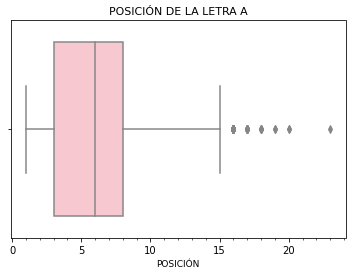

HISTOGRAMA


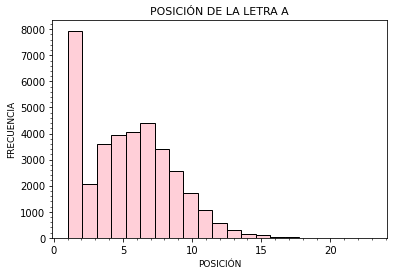

ESTIMACIÓN DE DENSIDAD DE KERNEL


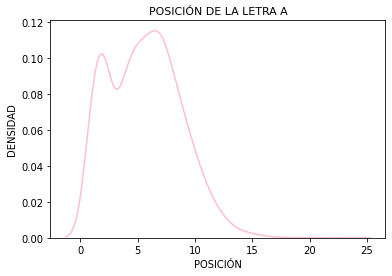

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA A
[6, 6, 5, 5, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 11, 11, 11, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 9, 9, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 8, 8, 8, 8, 7, 7, 13, 13, 13, 13, 6, 6, 6, 8, 8, 8, 8, 10, 10, 10, 11, 11, 11, 11, 7, 7, 7, 9, 9, 9, 7, 7, 7, 9, 9, 9, 9, 6, 6, 7, 7, 7, 7, 7, 8, 8, 14, 14, 5, 5, 7, 7, 7, 6, 6, 4, 4, 6, 11, 11, 10, 10, 7, 7, 9, 9, 11, 11, 4, 9, 9, 10, 5, 5, 6, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 5, 10, 10, 10, 6, 7, 7, 12, 12, 8, 8, 7, 8, 10, 10, 10, 8, 8, 6, 7, 7, 7, 8, 5, 5, 7, 7, 7, 8, 8, 8, 7, 7, 8, 8, 6, 6, 8, 8, 6, 6, 5, 9, 13, 13, 13, 14, 14, 7, 7, 8, 8, 7, 8, 9, 8, 8, 9, 6, 6, 7, 7, 8, 8, 6, 6, 5, 6, 8, 8, 8, 10, 10, 8, 8, 9, 9, 7, 7, 7, 7, 9, 9, 6, 8, 9, 9, 8, 8, 8, 8, 8, 6, 7, 4, 4, 6, 6, 6, 7, 7, 7, 10, 10, 10, 10, 11, 11, 11, 11, 6, 6, 6, 10, 10, 10, 10, 7, 7, 7, 9, 9, 9, 6, 6, 4, 13, 13, 9, 9, 9, 14, 14, 14, 10, 10, 10, 9, 9, 11, 11, 11, 12, 12, 12, 6, 6, 5, 8, 10, 8, 8,

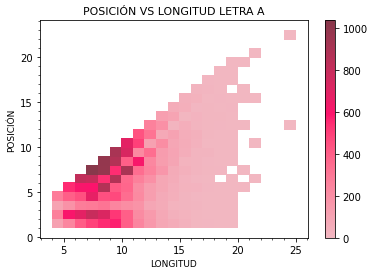

In [49]:
# Analysis for letter A
analysis_each_letter('a')

####Letter B

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA B
MEDIDAS DE TENDENCIA CENTRAL
{'median': 3.0, 'mode': 1}
MEDIDAS DE POSICIONAMIENTO
{'q1': 2.0, 'q2': 3.0, 'q3': 6.0, 'iqr': 4.0}
MEDIDAS DE DISPERSIÓN
{'range': 16, 'variance': 7.038299050671005, 'std_dev': 2.652979278221186}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


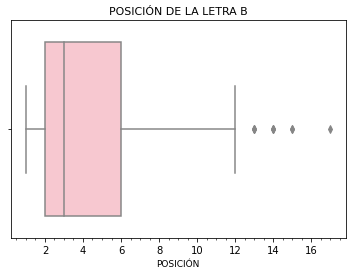

HISTOGRAMA


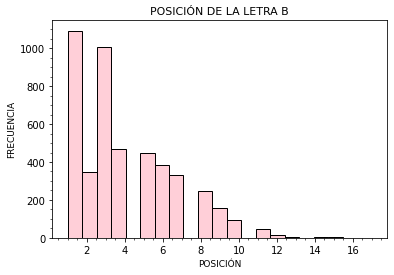

ESTIMACIÓN DE DENSIDAD DE KERNEL


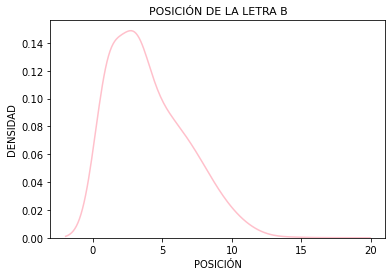

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA B
[4, 6, 6, 6, 5, 11, 8, 10, 10, 10, 10, 11, 11, 9, 11, 11, 11, 8, 8, 7, 13, 6, 8, 8, 10, 10, 11, 7, 9, 7, 9, 6, 7, 7, 8, 14, 5, 7, 6, 4, 4, 6, 6, 11, 11, 10, 7, 9, 11, 4, 9, 9, 10, 5, 5, 6, 5, 6, 6, 8, 8, 9, 5, 10, 6, 7, 12, 8, 7, 8, 10, 8, 6, 7, 8, 5, 7, 7, 8, 7, 8, 6, 8, 6, 5, 9, 13, 13, 14, 7, 8, 7, 8, 9, 8, 9, 6, 6, 7, 8, 6, 5, 6, 8, 8, 10, 10, 8, 9, 7, 7, 9, 6, 8, 9, 8, 8, 6, 7, 4, 6, 7, 10, 11, 6, 10, 7, 9, 6, 4, 13, 9, 14, 10, 9, 11, 12, 6, 5, 8, 10, 8, 8, 5, 5, 5, 6, 7, 7, 10, 15, 8, 7, 8, 8, 13, 9, 11, 11, 8, 9, 7, 7, 8, 8, 8, 8, 9, 9, 10, 10, 9, 9, 11, 11, 8, 8, 7, 10, 14, 9, 11, 13, 9, 10, 9, 10, 8, 7, 7, 6, 6, 7, 8, 4, 6, 9, 9, 7, 10, 9, 10, 12, 6, 8, 8, 5, 6, 5, 5, 7, 7, 7, 8, 6, 8, 6, 7, 8, 8, 5, 5, 13, 9, 14, 8, 9, 10, 8, 10, 9, 11, 8, 10, 12, 12, 11, 13, 11, 10, 8, 9, 10, 7, 8, 7, 8, 4, 9, 8, 10, 8, 9, 9, 7, 5, 9, 9, 9, 8, 9, 7, 8, 9, 14, 15, 15, 10, 10, 9, 10, 8, 17, 9, 10, 6, 8, 7, 7, 8, 6, 10, 7, 4, 8, 5, 8, 9, 7, 15, 13, 6, 8,

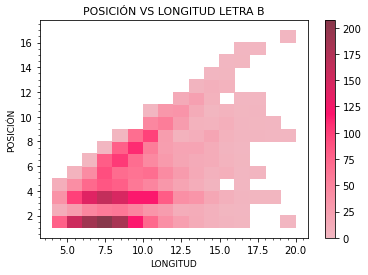

In [50]:
# Analysis for letter B
analysis_each_letter('b')

####Letter C

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA C
MEDIDAS DE TENDENCIA CENTRAL
{'median': 4, 'mode': 1}
MEDIDAS DE POSICIONAMIENTO
{'q1': 1.0, 'q2': 4.0, 'q3': 7.0, 'iqr': 6.0}
MEDIDAS DE DISPERSIÓN
{'range': 16, 'variance': 9.00813639489264, 'std_dev': 3.001355759468151}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


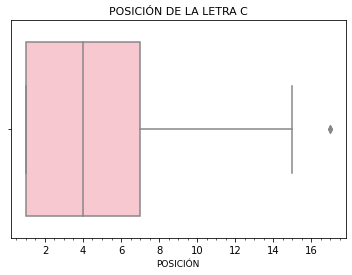

HISTOGRAMA


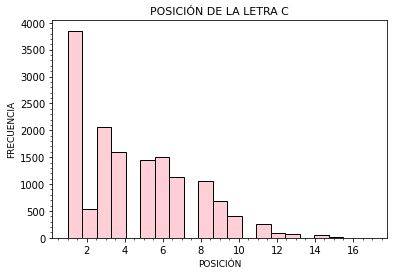

ESTIMACIÓN DE DENSIDAD DE KERNEL


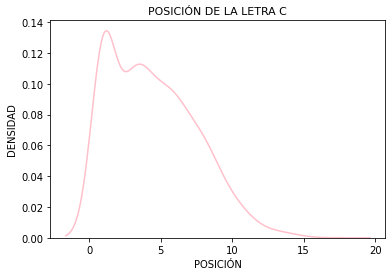

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA C
[6, 7, 6, 8, 10, 11, 7, 9, 7, 9, 6, 7, 8, 14, 10, 10, 7, 9, 9, 9, 10, 8, 9, 13, 13, 14, 9, 10, 11, 13, 10, 14, 11, 13, 13, 9, 10, 9, 10, 10, 5, 7, 7, 8, 6, 8, 6, 7, 8, 8, 5, 5, 9, 9, 4, 8, 9, 9, 9, 10, 10, 13, 13, 9, 9, 10, 10, 8, 7, 6, 7, 8, 8, 8, 8, 7, 7, 7, 6, 14, 10, 11, 7, 10, 8, 7, 8, 8, 8, 5, 6, 6, 7, 5, 10, 11, 5, 9, 9, 6, 6, 7, 7, 10, 10, 7, 7, 11, 11, 13, 13, 9, 9, 6, 6, 7, 7, 11, 11, 10, 10, 12, 12, 9, 9, 10, 10, 5, 5, 6, 6, 9, 9, 8, 8, 8, 8, 10, 10, 11, 11, 9, 9, 14, 14, 6, 7, 8, 9, 11, 11, 9, 9, 10, 12, 10, 8, 10, 7, 6, 7, 9, 10, 10, 8, 9, 7, 8, 8, 10, 10, 6, 8, 9, 10, 10, 10, 8, 9, 8, 9, 7, 9, 11, 7, 10, 9, 10, 9, 6, 8, 9, 9, 6, 6, 8, 8, 12, 12, 7, 7, 11, 11, 7, 7, 9, 9, 9, 9, 9, 9, 6, 6, 5, 6, 13, 8, 9, 6, 7, 4, 10, 10, 6, 6, 8, 7, 5, 6, 6, 9, 9, 5, 6, 9, 7, 8, 9, 7, 10, 10, 7, 6, 8, 8, 5, 6, 8, 7, 7, 9, 9, 6, 10, 9, 9, 10, 11, 8, 11, 10, 11, 10, 11, 14, 9, 11, 11, 12, 9, 11, 11, 10, 8, 8, 11, 9, 8, 9, 8, 9, 9, 14, 14, 15, 15, 9, 

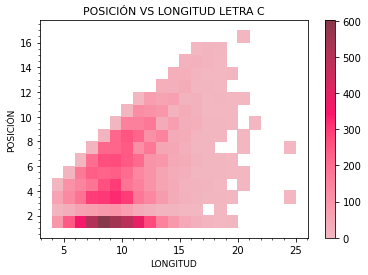

In [51]:
# Analysis for letter C
analysis_each_letter('c')

####Letter D

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA D
MEDIDAS DE TENDENCIA CENTRAL
{'median': 6, 'mode': 1}
MEDIDAS DE POSICIONAMIENTO
{'q1': 3.0, 'q2': 6.0, 'q3': 8.0, 'iqr': 5.0}
MEDIDAS DE DISPERSIÓN
{'range': 20, 'variance': 10.570742333179917, 'std_dev': 3.2512678039773832}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


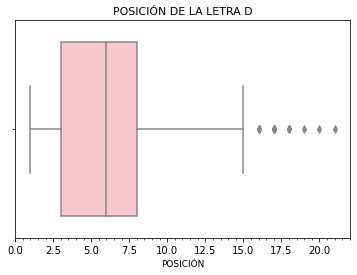

HISTOGRAMA


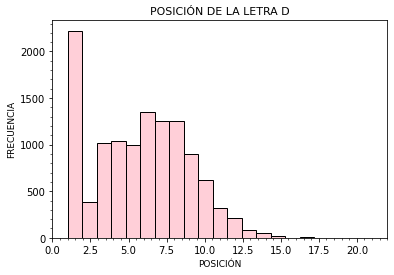

ESTIMACIÓN DE DENSIDAD DE KERNEL


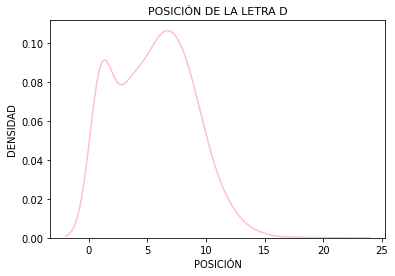

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA D
[4, 6, 6, 6, 11, 11, 8, 10, 10, 10, 10, 10, 11, 11, 11, 11, 9, 11, 11, 11, 8, 8, 11, 9, 7, 11, 10, 7, 9, 11, 4, 9, 9, 10, 6, 8, 10, 6, 10, 7, 8, 8, 7, 8, 7, 8, 9, 7, 8, 8, 10, 8, 8, 9, 9, 7, 7, 9, 6, 8, 8, 10, 9, 14, 10, 9, 5, 8, 10, 10, 15, 9, 10, 9, 7, 8, 6, 9, 7, 10, 9, 10, 5, 7, 8, 8, 4, 8, 9, 9, 10, 13, 9, 10, 8, 7, 6, 7, 8, 8, 14, 10, 11, 10, 10, 10, 11, 11, 9, 6, 7, 10, 7, 13, 13, 11, 11, 10, 12, 9, 10, 9, 9, 9, 10, 12, 10, 9, 10, 10, 8, 9, 8, 9, 9, 11, 11, 13, 8, 7, 5, 6, 6, 9, 5, 6, 9, 9, 8, 9, 7, 7, 9, 10, 9, 9, 9, 10, 10, 11, 10, 11, 10, 11, 11, 9, 8, 9, 9, 10, 9, 10, 8, 9, 9, 8, 8, 9, 9, 9, 6, 6, 11, 8, 8, 11, 11, 10, 11, 9, 7, 9, 9, 9, 9, 11, 11, 7, 10, 10, 11, 12, 8, 9, 7, 9, 6, 6, 9, 9, 10, 7, 8, 9, 10, 9, 10, 10, 8, 7, 8, 10, 7, 8, 7, 8, 4, 4, 4, 9, 4, 6, 5, 4, 8, 10, 10, 12, 8, 8, 8, 8, 9, 9, 12, 12, 7, 9, 9, 9, 6, 6, 7, 4, 4, 7, 7, 10, 8, 8, 13, 13, 9, 9, 8, 8, 9, 9, 7, 7, 11, 11, 10, 10, 11, 11, 14, 11, 11, 8, 8, 9, 6, 4, 5, 8

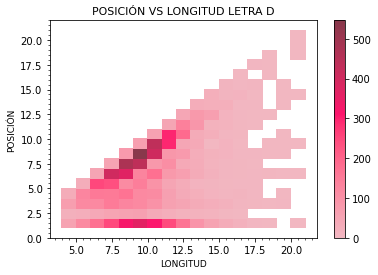

In [52]:
# Analysis for letter D
analysis_each_letter('d')

####Letter E

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA E
MEDIDAS DE TENDENCIA CENTRAL
{'median': 4.0, 'mode': 2}
MEDIDAS DE POSICIONAMIENTO
{'q1': 2.0, 'q2': 4.0, 'q3': 7.0, 'iqr': 5.0}
MEDIDAS DE DISPERSIÓN
{'range': 18, 'variance': 10.073441780665679, 'std_dev': 3.1738685827654676}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


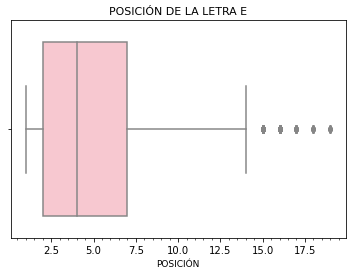

HISTOGRAMA


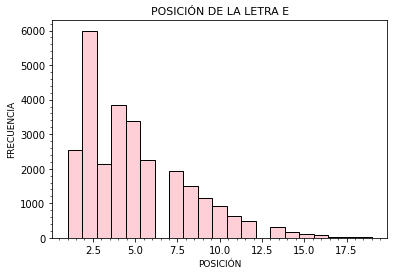

ESTIMACIÓN DE DENSIDAD DE KERNEL


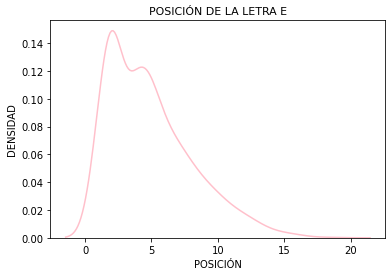

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA E
[6, 6, 11, 11, 8, 13, 10, 7, 8, 8, 14, 14, 5, 6, 11, 11, 11, 5, 6, 5, 6, 6, 8, 8, 8, 8, 9, 5, 7, 12, 12, 12, 8, 7, 8, 8, 8, 9, 8, 9, 10, 8, 9, 10, 4, 13, 13, 9, 14, 14, 14, 10, 9, 11, 12, 8, 10, 10, 8, 8, 7, 7, 15, 15, 8, 13, 13, 7, 8, 11, 10, 14, 9, 11, 13, 8, 6, 6, 7, 9, 10, 12, 5, 8, 9, 9, 10, 13, 9, 10, 8, 8, 7, 8, 8, 7, 14, 14, 8, 6, 9, 6, 6, 7, 7, 10, 10, 7, 11, 11, 13, 9, 9, 6, 7, 11, 10, 12, 12, 9, 9, 10, 10, 8, 9, 6, 6, 7, 7, 8, 9, 11, 11, 9, 9, 9, 9, 10, 10, 12, 12, 12, 10, 10, 8, 8, 10, 10, 7, 7, 6, 7, 9, 10, 10, 8, 9, 7, 8, 10, 10, 6, 8, 9, 9, 10, 10, 10, 8, 9, 8, 9, 7, 9, 11, 7, 10, 9, 10, 9, 6, 8, 9, 6, 8, 12, 12, 7, 11, 11, 7, 9, 9, 9, 9, 6, 5, 6, 13, 13, 13, 8, 9, 6, 7, 7, 10, 8, 7, 6, 8, 5, 6, 8, 9, 9, 10, 14, 11, 12, 10, 8, 11, 8, 9, 8, 9, 9, 14, 14, 15, 15, 12, 6, 11, 11, 11, 10, 10, 10, 9, 11, 11, 11, 7, 11, 8, 11, 11, 6, 9, 9, 10, 7, 8, 9, 11, 6, 9, 10, 12, 9, 6, 10, 8, 13, 13, 13, 9, 8, 9, 7, 7, 11, 10, 11, 14, 14, 11, 8, 8

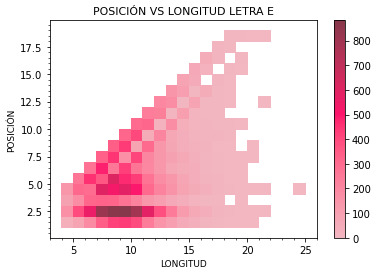

In [53]:
# Analysis for letter E
analysis_each_letter('e')

####Letter F

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA F
MEDIDAS DE TENDENCIA CENTRAL
{'median': 3.0, 'mode': 1}
MEDIDAS DE POSICIONAMIENTO
{'q1': 1.0, 'q2': 3.0, 'q3': 5.0, 'iqr': 4.0}
MEDIDAS DE DISPERSIÓN
{'range': 16, 'variance': 5.870245233467654, 'std_dev': 2.4228588967308133}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


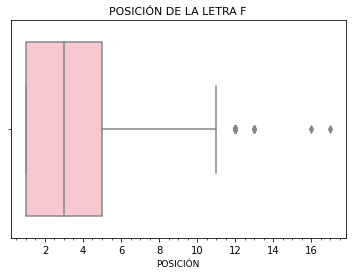

HISTOGRAMA


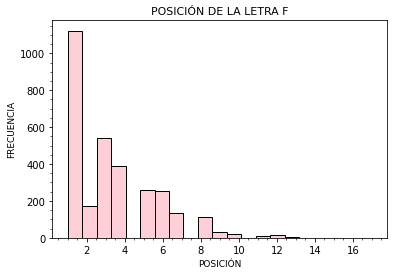

ESTIMACIÓN DE DENSIDAD DE KERNEL


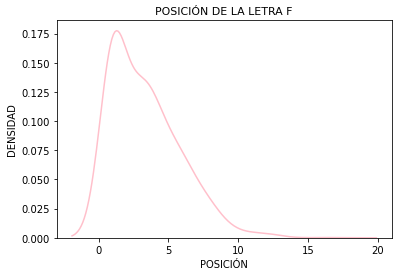

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA F
[8, 9, 9, 5, 6, 13, 4, 4, 10, 6, 8, 9, 10, 8, 9, 8, 9, 7, 9, 11, 7, 9, 8, 8, 9, 6, 9, 9, 7, 10, 6, 13, 10, 7, 10, 11, 7, 6, 10, 8, 9, 9, 9, 4, 7, 9, 11, 7, 7, 8, 8, 8, 5, 6, 8, 9, 10, 12, 8, 7, 9, 7, 9, 9, 9, 10, 6, 9, 9, 9, 9, 7, 6, 7, 4, 6, 8, 9, 9, 8, 9, 7, 7, 6, 9, 11, 6, 4, 13, 13, 14, 14, 15, 15, 10, 10, 17, 19, 7, 8, 6, 7, 6, 8, 4, 7, 4, 10, 15, 11, 10, 11, 14, 8, 9, 7, 7, 7, 9, 8, 7, 8, 9, 7, 6, 7, 7, 6, 10, 8, 13, 12, 12, 10, 13, 11, 8, 7, 8, 7, 10, 9, 11, 7, 7, 7, 12, 14, 13, 12, 14, 13, 8, 9, 9, 12, 6, 11, 9, 9, 10, 8, 9, 10, 12, 15, 9, 10, 10, 7, 11, 9, 12, 12, 9, 13, 15, 13, 11, 11, 12, 18, 14, 14, 14, 14, 15, 7, 8, 8, 8, 6, 9, 9, 5, 5, 13, 9, 9, 7, 10, 12, 8, 12, 9, 11, 11, 12, 12, 10, 13, 10, 9, 10, 13, 13, 9, 8, 16, 14, 14, 9, 10, 15, 11, 8, 9, 8, 9, 9, 12, 14, 7, 6, 7, 6, 6, 4, 5, 11, 12, 11, 12, 19, 4, 5, 9, 8, 7, 11, 7, 8, 10, 12, 14, 10, 10, 11, 9, 11, 9, 12, 8, 10, 12, 10, 10, 8, 9, 10, 7, 7, 11, 10, 10, 11, 12, 12, 13, 7, 1

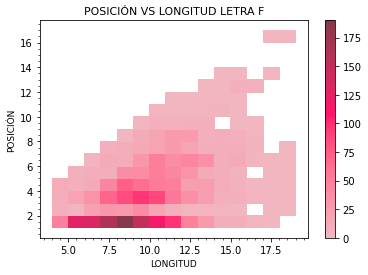

In [54]:
# Analysis for letter F
analysis_each_letter('f')

####Letter G

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA G
MEDIDAS DE TENDENCIA CENTRAL
{'median': 4.0, 'mode': 3}
MEDIDAS DE POSICIONAMIENTO
{'q1': 3.0, 'q2': 4.0, 'q3': 6.0, 'iqr': 3.0}
MEDIDAS DE DISPERSIÓN
{'range': 15, 'variance': 5.6507534633996785, 'std_dev': 2.3771313517346235}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


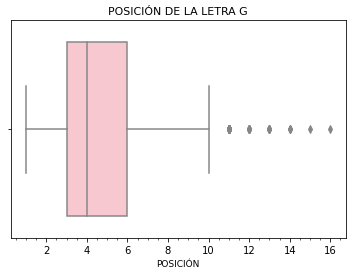

HISTOGRAMA


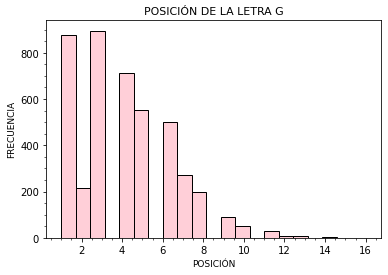

ESTIMACIÓN DE DENSIDAD DE KERNEL


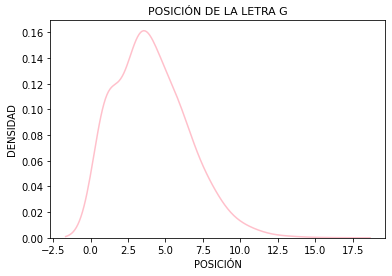

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA G
[10, 5, 7, 8, 7, 8, 6, 8, 6, 5, 8, 7, 8, 5, 6, 8, 7, 7, 9, 9, 6, 11, 9, 7, 6, 6, 15, 8, 10, 6, 5, 7, 8, 8, 9, 7, 9, 5, 6, 5, 7, 8, 7, 6, 6, 6, 7, 8, 9, 5, 9, 11, 7, 7, 6, 8, 6, 14, 8, 11, 11, 9, 8, 7, 10, 5, 6, 8, 6, 5, 8, 7, 8, 11, 6, 8, 6, 7, 8, 5, 5, 6, 9, 10, 10, 8, 9, 10, 14, 6, 6, 7, 7, 8, 7, 8, 8, 8, 12, 7, 9, 9, 9, 6, 9, 9, 7, 6, 6, 8, 8, 10, 10, 8, 8, 9, 9, 7, 7, 9, 9, 7, 7, 9, 9, 6, 6, 9, 10, 8, 10, 8, 9, 8, 4, 8, 9, 10, 12, 11, 9, 9, 5, 6, 6, 14, 15, 17, 12, 12, 14, 14, 15, 9, 11, 8, 9, 12, 12, 6, 9, 10, 12, 9, 9, 7, 7, 9, 9, 6, 4, 8, 9, 6, 8, 8, 10, 10, 10, 9, 11, 12, 5, 14, 5, 9, 10, 5, 6, 6, 7, 8, 4, 6, 7, 7, 7, 7, 8, 10, 7, 11, 10, 8, 6, 7, 9, 8, 8, 7, 9, 10, 10, 15, 5, 8, 8, 5, 8, 9, 9, 10, 6, 7, 8, 10, 11, 7, 7, 10, 10, 12, 11, 16, 12, 9, 10, 10, 6, 7, 5, 6, 6, 8, 10, 9, 10, 9, 7, 12, 5, 6, 11, 7, 6, 7, 8, 13, 5, 7, 5, 5, 6, 11, 6, 15, 15, 9, 9, 12, 8, 9, 9, 7, 8, 8, 5, 6, 7, 6, 11, 9, 6, 12, 8, 6, 9, 10, 12, 9, 10, 5, 15, 14, 6

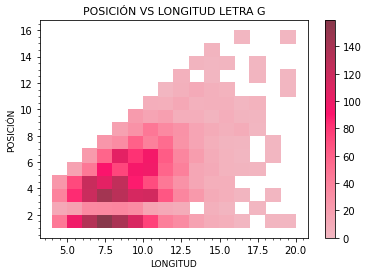

In [55]:
# Analysis for letter G
analysis_each_letter('g')

####Letter H

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA H
MEDIDAS DE TENDENCIA CENTRAL
{'median': 3, 'mode': 1}
MEDIDAS DE POSICIONAMIENTO
{'q1': 1.0, 'q2': 3.0, 'q3': 5.0, 'iqr': 4.0}
MEDIDAS DE DISPERSIÓN
{'range': 14, 'variance': 5.956297380356073, 'std_dev': 2.440552679283132}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


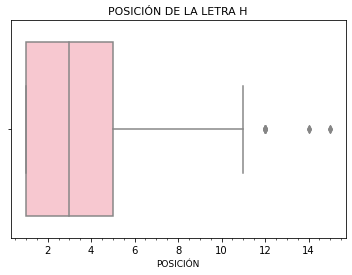

HISTOGRAMA


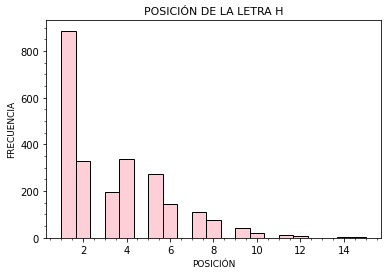

ESTIMACIÓN DE DENSIDAD DE KERNEL


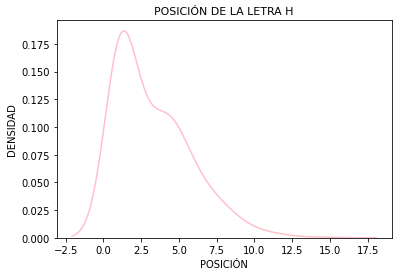

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA H
[6, 10, 10, 6, 7, 10, 11, 9, 4, 10, 6, 8, 7, 10, 10, 8, 10, 7, 7, 8, 12, 10, 7, 7, 15, 9, 10, 6, 7, 6, 6, 11, 5, 5, 7, 8, 6, 5, 9, 12, 6, 11, 9, 7, 6, 7, 9, 9, 9, 9, 8, 8, 10, 5, 9, 6, 8, 7, 15, 7, 10, 11, 10, 11, 7, 6, 7, 9, 12, 5, 7, 9, 9, 9, 8, 7, 5, 6, 5, 7, 6, 7, 8, 6, 9, 9, 5, 9, 7, 13, 14, 13, 7, 9, 9, 11, 9, 11, 12, 11, 12, 15, 16, 10, 12, 10, 12, 12, 9, 8, 10, 10, 12, 13, 12, 10, 7, 7, 8, 12, 9, 7, 9, 12, 12, 6, 10, 9, 6, 6, 5, 9, 7, 5, 5, 13, 10, 9, 9, 16, 13, 4, 7, 9, 12, 9, 8, 6, 5, 4, 10, 11, 8, 7, 8, 6, 5, 7, 11, 6, 9, 7, 5, 8, 5, 9, 13, 7, 11, 13, 8, 5, 11, 6, 5, 5, 10, 11, 8, 7, 9, 5, 5, 7, 4, 11, 12, 11, 6, 8, 8, 5, 7, 11, 11, 6, 8, 6, 14, 8, 8, 7, 6, 8, 8, 10, 6, 6, 10, 8, 7, 8, 9, 5, 4, 9, 9, 8, 9, 10, 9, 10, 8, 6, 7, 8, 10, 12, 13, 8, 9, 10, 6, 10, 8, 9, 6, 8, 9, 6, 7, 9, 9, 9, 4, 8, 6, 8, 5, 8, 10, 11, 8, 8, 5, 12, 8, 9, 12, 12, 11, 11, 7, 7, 8, 8, 9, 7, 8, 6, 5, 7, 8, 6, 9, 10, 9, 8, 8, 8, 9, 9, 7, 13, 11, 7, 10, 9, 5, 7, 5

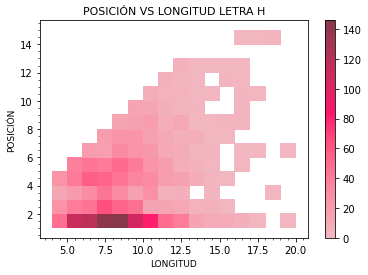

In [56]:
# Analysis for letter H
analysis_each_letter('h')

####Letter I

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA I
MEDIDAS DE TENDENCIA CENTRAL
{'median': 5.0, 'mode': 4}
MEDIDAS DE POSICIONAMIENTO
{'q1': 4.0, 'q2': 5.0, 'q3': 7.0, 'iqr': 3.0}
MEDIDAS DE DISPERSIÓN
{'range': 20, 'variance': 7.6031526571339985, 'std_dev': 2.7573814856007863}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


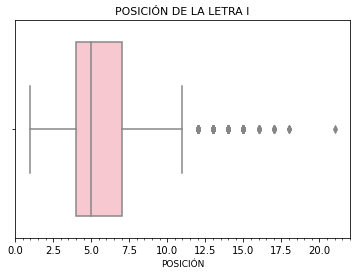

HISTOGRAMA


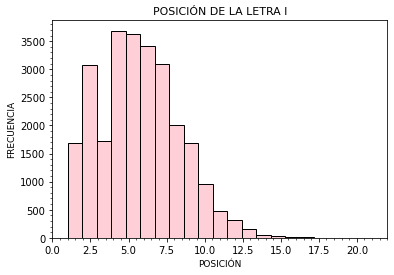

ESTIMACIÓN DE DENSIDAD DE KERNEL


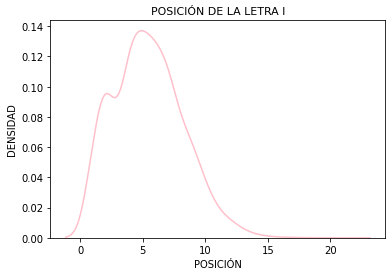

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA I
[6, 7, 13, 9, 14, 14, 7, 6, 11, 10, 10, 7, 9, 11, 9, 9, 10, 10, 6, 7, 12, 8, 7, 8, 10, 8, 8, 8, 6, 7, 8, 9, 9, 13, 13, 13, 13, 13, 13, 14, 14, 14, 7, 8, 7, 8, 9, 8, 9, 6, 6, 8, 9, 10, 11, 13, 13, 9, 14, 10, 9, 11, 12, 6, 5, 8, 10, 8, 8, 5, 5, 5, 6, 7, 8, 11, 11, 8, 9, 10, 9, 11, 8, 10, 14, 14, 9, 11, 11, 13, 8, 10, 12, 12, 8, 8, 8, 9, 8, 9, 9, 10, 13, 13, 9, 10, 8, 6, 7, 8, 8, 7, 11, 9, 10, 7, 13, 13, 13, 9, 11, 10, 12, 9, 10, 5, 6, 9, 8, 8, 10, 10, 11, 11, 9, 9, 14, 14, 6, 7, 8, 9, 11, 8, 10, 10, 10, 8, 9, 12, 9, 9, 8, 7, 5, 6, 6, 9, 9, 9, 5, 6, 9, 7, 10, 8, 7, 7, 9, 9, 6, 10, 14, 14, 14, 15, 15, 12, 11, 11, 11, 11, 8, 8, 9, 9, 10, 10, 8, 9, 8, 8, 9, 9, 7, 9, 6, 6, 10, 10, 11, 9, 7, 9, 9, 11, 11, 8, 8, 9, 9, 10, 10, 6, 7, 6, 9, 11, 10, 13, 13, 11, 12, 9, 8, 8, 9, 8, 9, 9, 9, 7, 9, 6, 6, 9, 9, 9, 12, 11, 11, 9, 11, 8, 9, 6, 10, 12, 7, 10, 14, 10, 8, 10, 7, 7, 8, 12, 12, 10, 10, 7, 7, 7, 7, 9, 9, 11, 11, 14, 14, 9, 9, 8, 8, 6, 7, 14, 14, 6, 6, 8,

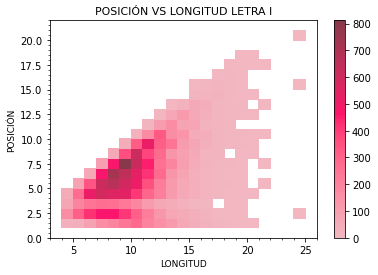

In [57]:
# Analysis for letter I
analysis_each_letter('i')

####Letter J

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA J
MEDIDAS DE TENDENCIA CENTRAL
{'median': 3.0, 'mode': 1}
MEDIDAS DE POSICIONAMIENTO
{'q1': 1.0, 'q2': 3.0, 'q3': 5.0, 'iqr': 4.0}
MEDIDAS DE DISPERSIÓN
{'range': 13, 'variance': 5.028588234690615, 'std_dev': 2.2424513895936777}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


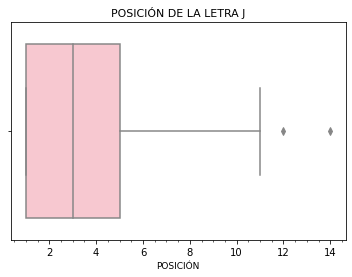

HISTOGRAMA


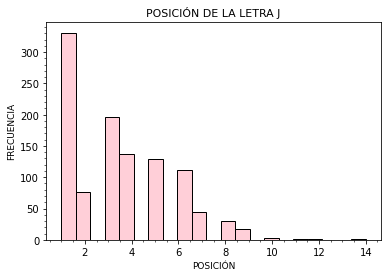

ESTIMACIÓN DE DENSIDAD DE KERNEL


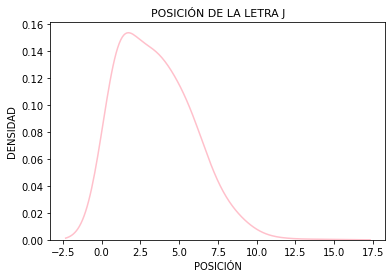

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA J
[5, 5, 6, 7, 9, 11, 9, 8, 9, 8, 8, 12, 10, 14, 8, 7, 8, 5, 7, 9, 6, 7, 8, 4, 7, 7, 5, 6, 8, 5, 6, 4, 6, 7, 7, 8, 4, 5, 11, 6, 8, 8, 9, 9, 7, 9, 6, 7, 11, 6, 5, 7, 7, 8, 7, 8, 6, 10, 11, 12, 9, 8, 5, 6, 7, 10, 5, 7, 6, 10, 11, 10, 11, 12, 12, 8, 12, 9, 10, 9, 10, 9, 6, 9, 11, 7, 8, 9, 10, 8, 8, 6, 6, 4, 6, 8, 6, 5, 10, 11, 9, 6, 11, 5, 4, 6, 7, 7, 5, 6, 7, 5, 8, 4, 5, 7, 6, 10, 9, 6, 15, 13, 4, 8, 9, 10, 8, 8, 9, 7, 7, 6, 8, 4, 7, 8, 4, 5, 5, 9, 9, 8, 5, 8, 11, 7, 6, 8, 9, 9, 10, 7, 8, 9, 11, 12, 8, 9, 8, 10, 7, 8, 10, 7, 6, 7, 9, 10, 10, 8, 10, 8, 13, 9, 8, 9, 10, 7, 8, 10, 11, 14, 8, 6, 7, 12, 6, 9, 10, 6, 9, 5, 6, 4, 6, 7, 7, 6, 5, 7, 9, 5, 6, 7, 8, 7, 7, 7, 6, 4, 4, 8, 9, 10, 9, 17, 11, 9, 8, 9, 8, 7, 10, 11, 8, 9, 7, 9, 6, 7, 7, 6, 4, 7, 9, 11, 7, 9, 10, 9, 10, 8, 10, 8, 9, 9, 7, 8, 10, 12, 11, 12, 7, 8, 6, 7, 7, 9, 7, 8, 9, 10, 8, 9, 8, 10, 12, 10, 7, 8, 9, 4, 5, 6, 7, 8, 9, 9, 11, 6, 8, 8, 9, 9, 12, 6, 7, 7, 6, 9, 8, 9, 7, 9, 8, 10, 14, 7,

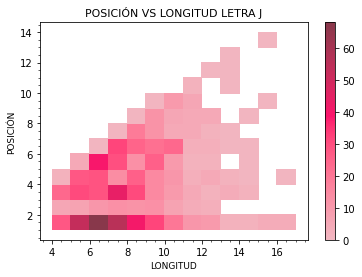

In [58]:
# Analysis for letter J
analysis_each_letter('j')

####Letter K

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA K
MEDIDAS DE TENDENCIA CENTRAL
{'median': 4, 'mode': 1}
MEDIDAS DE POSICIONAMIENTO
{'q1': 1.0, 'q2': 4.0, 'q3': 5.0, 'iqr': 4.0}
MEDIDAS DE DISPERSIÓN
{'range': 14, 'variance': 6.837125863854173, 'std_dev': 2.614789831679436}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


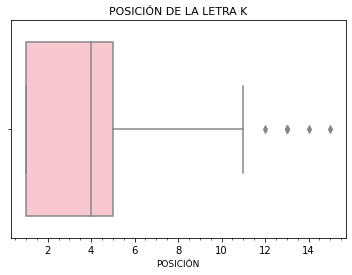

HISTOGRAMA


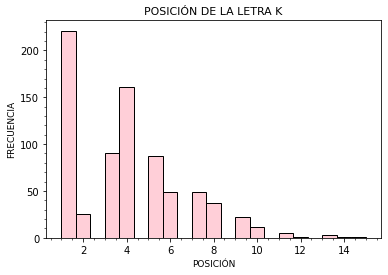

ESTIMACIÓN DE DENSIDAD DE KERNEL


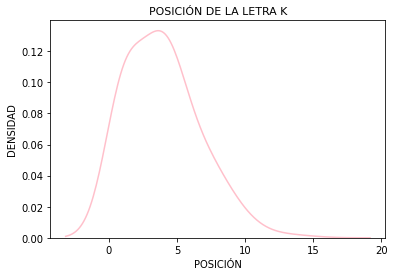

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA K
[6, 9, 11, 6, 10, 6, 7, 4, 8, 5, 5, 5, 7, 7, 6, 6, 5, 6, 6, 8, 6, 9, 7, 5, 10, 15, 10, 13, 10, 6, 10, 9, 8, 9, 6, 5, 6, 4, 8, 4, 5, 7, 4, 7, 7, 7, 7, 4, 6, 6, 6, 6, 4, 6, 8, 6, 8, 7, 10, 9, 6, 8, 11, 11, 8, 11, 5, 8, 10, 12, 4, 8, 10, 11, 11, 4, 9, 5, 5, 7, 9, 6, 10, 5, 8, 7, 8, 8, 6, 7, 8, 7, 5, 5, 4, 5, 7, 5, 6, 9, 7, 8, 8, 8, 11, 8, 4, 7, 9, 10, 8, 14, 4, 9, 9, 9, 4, 6, 6, 8, 9, 8, 6, 5, 8, 16, 14, 5, 5, 8, 8, 12, 12, 12, 7, 5, 8, 8, 4, 7, 7, 10, 7, 7, 11, 8, 8, 8, 8, 6, 6, 6, 4, 8, 5, 9, 7, 8, 14, 9, 8, 5, 7, 7, 6, 4, 14, 14, 7, 5, 15, 15, 9, 5, 8, 5, 7, 5, 9, 5, 13, 5, 8, 7, 9, 13, 7, 7, 7, 7, 5, 5, 9, 8, 8, 9, 10, 6, 7, 7, 7, 6, 8, 5, 7, 11, 5, 7, 4, 4, 7, 5, 9, 7, 8, 4, 7, 8, 6, 7, 6, 6, 7, 6, 9, 10, 5, 5, 4, 4, 6, 8, 4, 8, 8, 9, 5, 4, 10, 8, 8, 9, 9, 5, 9, 12, 4, 5, 6, 4, 8, 8, 6, 12, 5, 4, 5, 12, 12, 9, 9, 10, 6, 7, 6, 4, 9, 8, 8, 5, 6, 6, 6, 9, 5, 6, 4, 7, 7, 9, 7, 8, 8, 12, 11, 9, 9, 6, 8, 8, 7, 9, 10, 5, 8, 8, 11, 11, 11, 5, 6, 7, 10

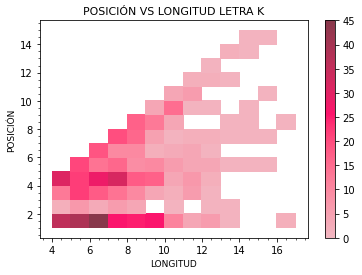

In [59]:
# Analysis for letter K
analysis_each_letter('k')

####Letter L


DISTRIBUCIÓN DE POSICIÓN DE LA LETRA L
MEDIDAS DE TENDENCIA CENTRAL
{'median': 4, 'mode': 3}
MEDIDAS DE POSICIONAMIENTO
{'q1': 3.0, 'q2': 4.0, 'q3': 6.0, 'iqr': 3.0}
MEDIDAS DE DISPERSIÓN
{'range': 19, 'variance': 7.419580049613764, 'std_dev': 2.7238906089661095}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


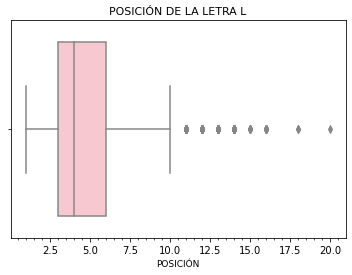

HISTOGRAMA


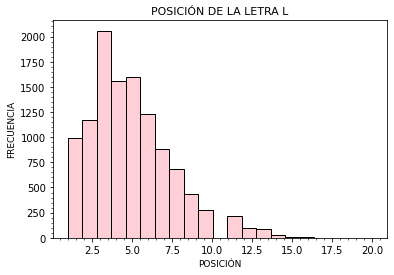

ESTIMACIÓN DE DENSIDAD DE KERNEL


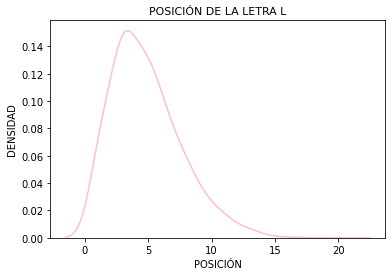

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA L
[10, 7, 9, 11, 6, 6, 6, 9, 13, 13, 14, 7, 8, 7, 8, 9, 8, 9, 6, 6, 10, 5, 8, 13, 9, 11, 11, 8, 9, 6, 6, 7, 9, 9, 7, 7, 6, 6, 14, 10, 11, 8, 7, 10, 11, 11, 13, 9, 10, 12, 14, 11, 9, 9, 10, 12, 10, 8, 10, 7, 9, 10, 11, 9, 10, 10, 8, 8, 9, 8, 9, 7, 10, 7, 6, 8, 8, 11, 11, 9, 8, 9, 12, 11, 11, 11, 8, 9, 6, 8, 10, 13, 11, 12, 9, 11, 12, 11, 9, 10, 9, 10, 8, 10, 11, 10, 9, 10, 12, 9, 11, 10, 11, 14, 11, 8, 8, 9, 9, 11, 14, 14, 7, 9, 8, 12, 12, 5, 6, 7, 12, 12, 9, 6, 8, 9, 9, 9, 7, 6, 7, 13, 5, 9, 12, 14, 9, 10, 11, 10, 7, 6, 10, 8, 9, 9, 9, 9, 9, 9, 9, 7, 14, 15, 15, 7, 7, 8, 9, 8, 14, 8, 11, 11, 9, 8, 7, 7, 9, 10, 8, 9, 10, 12, 11, 15, 12, 14, 8, 14, 6, 9, 9, 8, 8, 8, 8, 8, 5, 13, 7, 8, 7, 11, 6, 8, 6, 8, 7, 8, 11, 4, 7, 8, 6, 5, 6, 8, 10, 7, 7, 7, 10, 6, 4, 6, 7, 7, 6, 10, 8, 6, 7, 6, 9, 4, 6, 8, 4, 8, 5, 8, 9, 7, 15, 15, 13, 6, 8, 5, 7, 9, 8, 8, 7, 9, 6, 7, 9, 7, 10, 7, 10, 5, 7, 15, 5, 6, 6, 7, 7, 7, 8, 8, 14, 14, 14, 7, 9, 10, 9, 10, 9, 10, 8, 10,

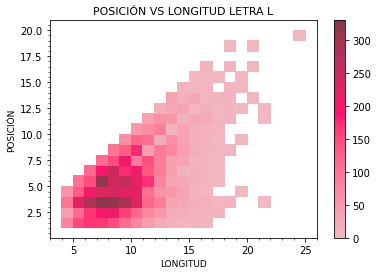

In [60]:
# Analysis for letter L
analysis_each_letter('l')

####Letter M

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA M
MEDIDAS DE TENDENCIA CENTRAL
{'median': 3.0, 'mode': 1}
MEDIDAS DE POSICIONAMIENTO
{'q1': 2.0, 'q2': 3.0, 'q3': 6.0, 'iqr': 4.0}
MEDIDAS DE DISPERSIÓN
{'range': 19, 'variance': 8.174672474612555, 'std_dev': 2.8591384147348577}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


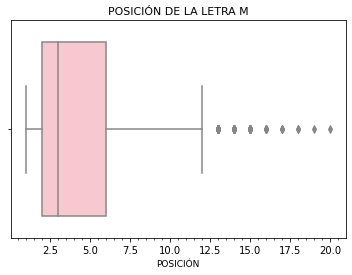

HISTOGRAMA


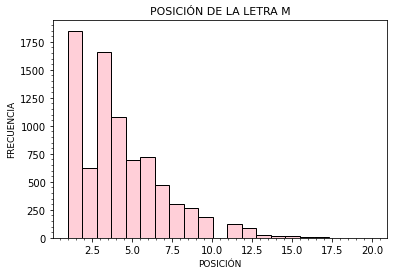

ESTIMACIÓN DE DENSIDAD DE KERNEL


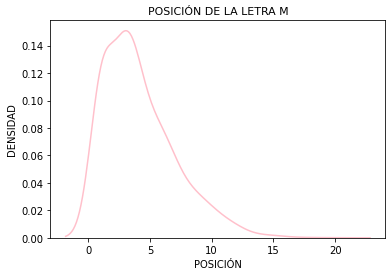

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA M
[13, 14, 9, 11, 10, 12, 6, 13, 7, 10, 11, 14, 10, 15, 15, 13, 11, 14, 4, 12, 8, 9, 9, 10, 13, 9, 10, 8, 7, 14, 9, 9, 12, 13, 8, 9, 7, 10, 9, 9, 10, 11, 8, 11, 10, 11, 10, 11, 14, 14, 9, 11, 11, 12, 9, 11, 11, 10, 8, 8, 14, 15, 12, 10, 12, 11, 13, 8, 6, 11, 11, 11, 9, 10, 9, 10, 8, 10, 11, 4, 6, 5, 13, 14, 6, 14, 14, 8, 10, 14, 16, 12, 13, 12, 13, 14, 15, 13, 11, 11, 14, 15, 14, 15, 6, 8, 9, 10, 9, 8, 9, 11, 7, 7, 7, 9, 9, 8, 6, 7, 7, 8, 8, 8, 9, 7, 7, 9, 11, 10, 12, 10, 9, 10, 9, 13, 6, 8, 9, 10, 12, 8, 7, 9, 7, 9, 9, 9, 10, 6, 13, 13, 14, 14, 15, 15, 8, 9, 14, 11, 14, 12, 9, 10, 14, 15, 15, 9, 11, 8, 9, 12, 8, 4, 6, 5, 5, 12, 8, 13, 11, 5, 8, 10, 7, 7, 7, 10, 6, 6, 9, 9, 5, 11, 4, 6, 7, 8, 8, 8, 15, 8, 12, 11, 16, 16, 12, 9, 10, 8, 10, 11, 12, 10, 10, 9, 9, 11, 12, 11, 12, 12, 12, 11, 11, 8, 11, 12, 12, 8, 9, 12, 8, 10, 4, 7, 8, 11, 10, 10, 14, 14, 9, 9, 5, 9, 9, 7, 7, 9, 10, 12, 6, 8, 11, 11, 8, 9, 8, 16, 9, 9, 8, 6, 7, 9, 5, 7, 9, 5, 7, 5, 13

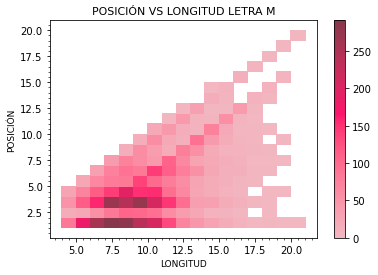

In [61]:
# Analysis for letter M
analysis_each_letter('m')

####Letter N

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA N
MEDIDAS DE TENDENCIA CENTRAL
{'median': 6.0, 'mode': 3}
MEDIDAS DE POSICIONAMIENTO
{'q1': 3.0, 'q2': 6.0, 'q3': 8.0, 'iqr': 5.0}
MEDIDAS DE DISPERSIÓN
{'range': 23, 'variance': 9.916469675765887, 'std_dev': 3.1490426602010153}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


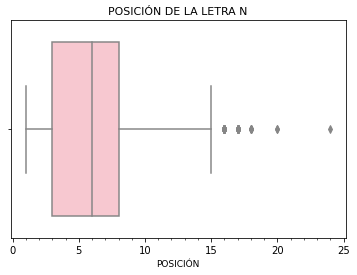

HISTOGRAMA


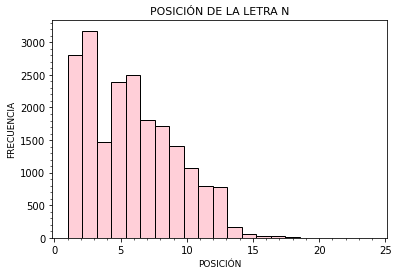

ESTIMACIÓN DE DENSIDAD DE KERNEL


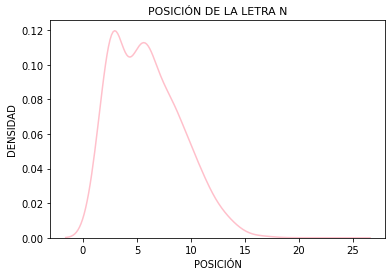

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA N
[6, 5, 6, 11, 8, 8, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 9, 9, 11, 11, 11, 11, 11, 11, 11, 11, 8, 8, 8, 8, 7, 13, 7, 9, 14, 6, 10, 9, 11, 9, 8, 12, 8, 6, 8, 9, 13, 13, 14, 9, 9, 7, 8, 6, 5, 6, 7, 9, 8, 7, 9, 13, 14, 6, 8, 10, 8, 8, 15, 8, 13, 8, 11, 10, 10, 14, 14, 9, 9, 11, 11, 13, 6, 9, 9, 7, 7, 10, 10, 9, 9, 10, 10, 12, 6, 8, 8, 14, 11, 10, 6, 6, 7, 10, 11, 10, 12, 9, 10, 6, 9, 8, 8, 10, 11, 9, 14, 8, 9, 11, 10, 10, 6, 7, 9, 10, 10, 10, 8, 9, 7, 8, 10, 10, 7, 9, 11, 10, 9, 12, 7, 11, 9, 13, 7, 10, 9, 9, 11, 14, 9, 11, 11, 12, 11, 11, 11, 9, 8, 9, 9, 8, 9, 14, 14, 15, 15, 12, 9, 11, 13, 11, 11, 8, 9, 10, 11, 9, 8, 9, 11, 13, 11, 6, 8, 8, 6, 9, 9, 7, 9, 9, 12, 11, 8, 10, 8, 9, 11, 10, 8, 6, 4, 10, 12, 12, 9, 7, 10, 13, 7, 11, 10, 11, 14, 14, 11, 11, 8, 8, 9, 4, 5, 8, 8, 10, 10, 7, 10, 10, 8, 10, 8, 12, 10, 7, 9, 11, 14, 14, 9, 14, 8, 10, 11, 11, 7, 12, 14, 7, 8, 10, 14, 14, 16, 16, 12, 13, 12, 13, 14, 15, 13, 11, 11, 11, 14, 15, 14, 15, 

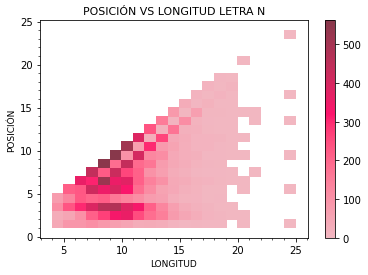

In [62]:
# Analysis for letter N
analysis_each_letter('n')

####Letter Ñ

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA Ñ
MEDIDAS DE TENDENCIA CENTRAL
{'median': 5.0, 'mode': 3}
MEDIDAS DE POSICIONAMIENTO
{'q1': 3.0, 'q2': 5.0, 'q3': 6.0, 'iqr': 3.0}
MEDIDAS DE DISPERSIÓN
{'range': 12, 'variance': 3.8776753712237584, 'std_dev': 1.9691813962212212}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


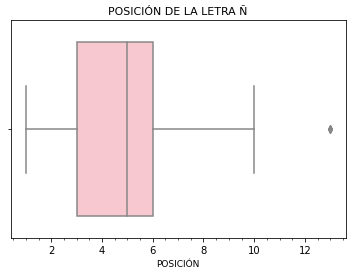

HISTOGRAMA


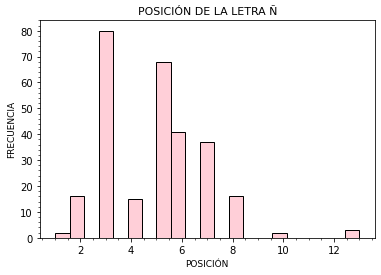

ESTIMACIÓN DE DENSIDAD DE KERNEL


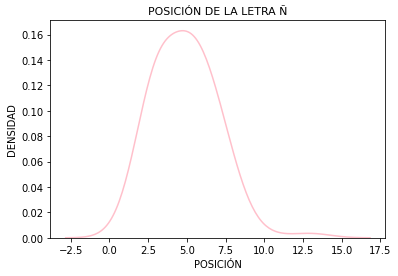

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA Ñ
[8, 11, 10, 11, 10, 11, 14, 9, 11, 11, 12, 9, 11, 11, 10, 8, 8, 5, 7, 8, 7, 8, 6, 5, 9, 6, 8, 7, 8, 8, 8, 6, 9, 9, 12, 5, 6, 6, 7, 7, 8, 9, 9, 9, 6, 6, 8, 8, 11, 5, 4, 7, 6, 5, 4, 5, 9, 10, 7, 8, 7, 8, 6, 8, 9, 8, 9, 6, 7, 8, 8, 4, 6, 5, 5, 7, 7, 6, 7, 11, 4, 10, 9, 10, 8, 9, 9, 8, 8, 10, 4, 6, 6, 4, 4, 6, 7, 6, 7, 7, 6, 6, 7, 4, 5, 10, 7, 10, 9, 11, 11, 10, 12, 12, 9, 9, 10, 8, 9, 8, 9, 11, 9, 9, 7, 9, 6, 7, 5, 6, 12, 8, 9, 7, 6, 9, 10, 11, 8, 9, 7, 10, 9, 7, 6, 7, 9, 6, 8, 9, 8, 7, 9, 10, 7, 9, 9, 9, 6, 10, 9, 6, 7, 9, 6, 7, 8, 9, 9, 12, 6, 13, 7, 7, 8, 8, 6, 7, 7, 8, 12, 4, 7, 9, 8, 6, 7, 8, 7, 8, 10, 9, 10, 9, 10, 9, 6, 5, 6, 8, 4, 5, 5, 4, 5, 7, 7, 5, 4, 9, 5, 7, 5, 8, 7, 4, 7, 8, 7, 8, 6, 4, 7, 7, 5, 6, 14, 14, 15, 8, 9, 6, 10, 9, 6, 8, 9, 7, 11, 11, 4, 5, 6, 8, 8, 8, 9, 7, 9, 7, 8, 9, 7, 12, 6, 5, 5, 6, 7, 10, 7, 8, 7, 6, 5, 6, 6, 7, 5, 6, 6, 7, 4, 9, 7, 5, 7, 6, 4, 4]
HISTOGRAMA POSICIÓN VS LONGITUD


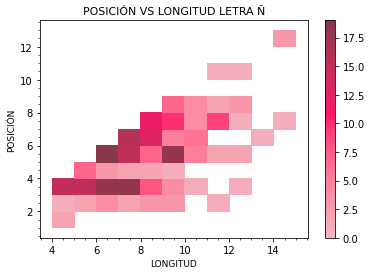

In [63]:
# Analysis for letter Ñ
analysis_each_letter('ñ')

####Letter O


DISTRIBUCIÓN DE POSICIÓN DE LA LETRA O
MEDIDAS DE TENDENCIA CENTRAL
{'median': 6.0, 'mode': 2}
MEDIDAS DE POSICIONAMIENTO
{'q1': 3.0, 'q2': 6.0, 'q3': 8.0, 'iqr': 5.0}
MEDIDAS DE DISPERSIÓN
{'range': 24, 'variance': 10.631349785007249, 'std_dev': 3.2605750696782385}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


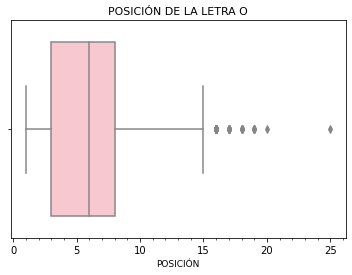

HISTOGRAMA


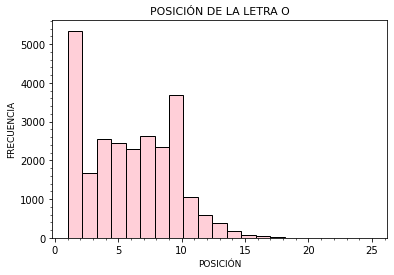

ESTIMACIÓN DE DENSIDAD DE KERNEL


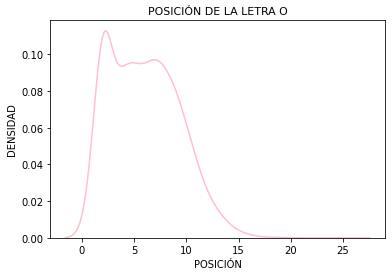

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA O
[5, 5, 11, 8, 10, 10, 10, 10, 11, 11, 11, 11, 9, 11, 11, 11, 11, 8, 8, 8, 7, 13, 11, 9, 6, 14, 6, 10, 9, 11, 9, 9, 10, 6, 5, 6, 7, 8, 10, 6, 8, 8, 5, 7, 8, 7, 7, 8, 8, 6, 8, 8, 6, 5, 5, 9, 9, 13, 13, 13, 13, 13, 14, 14, 7, 8, 7, 7, 8, 8, 9, 9, 8, 9, 9, 6, 6, 6, 7, 7, 8, 8, 6, 5, 5, 6, 6, 8, 10, 8, 8, 9, 9, 7, 7, 9, 9, 6, 6, 8, 9, 8, 8, 8, 6, 6, 7, 7, 9, 6, 13, 9, 8, 10, 8, 5, 7, 10, 15, 7, 8, 13, 9, 11, 11, 11, 8, 8, 9, 9, 7, 8, 8, 9, 10, 9, 9, 11, 11, 8, 8, 7, 7, 10, 14, 14, 13, 9, 10, 7, 6, 7, 12, 8, 5, 6, 7, 8, 8, 8, 5, 9, 9, 10, 6, 7, 8, 7, 6, 14, 10, 10, 11, 10, 7, 8, 5, 5, 10, 11, 10, 7, 11, 6, 7, 11, 5, 6, 9, 9, 8, 8, 10, 11, 14, 11, 9, 10, 12, 10, 10, 7, 6, 10, 7, 8, 10, 10, 8, 9, 9, 11, 9, 10, 9, 6, 9, 12, 11, 9, 6, 5, 6, 8, 9, 6, 7, 6, 7, 5, 6, 9, 7, 8, 9, 10, 6, 8, 5, 6, 8, 8, 7, 7, 7, 9, 9, 9, 9, 6, 6, 10, 10, 9, 9, 9, 9, 10, 10, 11, 11, 11, 8, 11, 10, 11, 10, 10, 11, 11, 14, 14, 9, 11, 11, 11, 12, 9, 11, 11, 11, 10, 8, 8, 8, 11, 11,

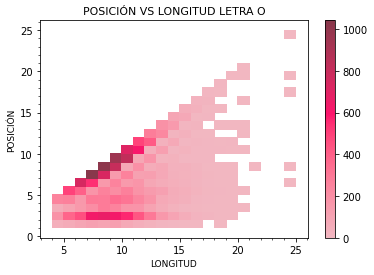

In [64]:
# Analysis for letter O
analysis_each_letter('o')

####Letter P

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA P
MEDIDAS DE TENDENCIA CENTRAL
{'median': 3, 'mode': 1}
MEDIDAS DE POSICIONAMIENTO
{'q1': 1.0, 'q2': 3.0, 'q3': 4.0, 'iqr': 3.0}
MEDIDAS DE DISPERSIÓN
{'range': 17, 'variance': 4.045859775238439, 'std_dev': 2.0114322696124867}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


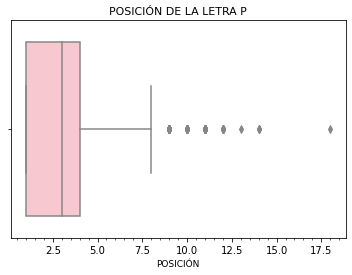

HISTOGRAMA


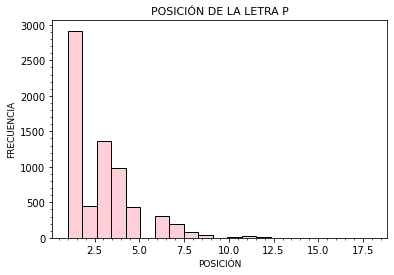

ESTIMACIÓN DE DENSIDAD DE KERNEL


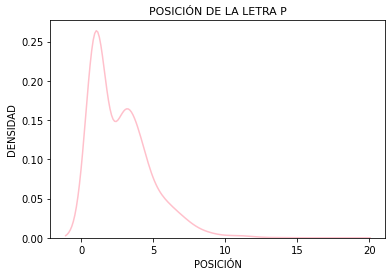

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA P
[8, 7, 10, 8, 7, 8, 9, 8, 10, 6, 8, 9, 10, 10, 8, 9, 8, 9, 7, 9, 11, 7, 10, 9, 10, 9, 6, 7, 8, 11, 10, 11, 10, 11, 14, 9, 11, 11, 12, 9, 11, 11, 10, 8, 8, 9, 8, 9, 12, 9, 8, 10, 10, 12, 8, 8, 9, 12, 7, 9, 9, 9, 6, 6, 7, 7, 8, 6, 9, 8, 9, 8, 9, 7, 9, 12, 7, 9, 9, 6, 7, 8, 6, 12, 15, 15, 8, 12, 14, 10, 13, 14, 13, 14, 10, 11, 16, 17, 6, 14, 14, 12, 6, 9, 10, 12, 9, 9, 7, 7, 9, 9, 6, 10, 8, 15, 14, 6, 5, 5, 6, 7, 6, 10, 9, 10, 9, 10, 8, 6, 7, 6, 8, 10, 12, 8, 9, 8, 11, 7, 9, 11, 7, 9, 9, 7, 10, 11, 13, 12, 12, 10, 6, 7, 8, 11, 11, 12, 8, 12, 14, 10, 11, 12, 14, 12, 15, 8, 12, 11, 11, 14, 16, 9, 10, 11, 9, 15, 10, 10, 16, 15, 16, 17, 12, 13, 10, 11, 12, 13, 13, 11, 12, 14, 13, 11, 7, 8, 14, 5, 8, 6, 8, 9, 6, 7, 8, 12, 13, 12, 7, 8, 8, 10, 8, 9, 9, 9, 11, 10, 11, 11, 8, 9, 8, 13, 9, 9, 11, 10, 11, 8, 8, 8, 9, 11, 11, 7, 9, 9, 6, 9, 6, 10, 10, 6, 7, 9, 8, 7, 6, 8, 5, 9, 11, 6, 8, 6, 8, 5, 7, 6, 8, 9, 8, 9, 10, 6, 8, 10, 7, 4, 5, 6, 10, 10, 4, 11, 6, 1

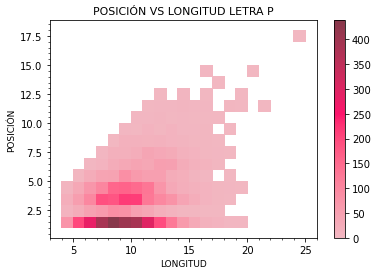

In [65]:
# Analysis for letter P
analysis_each_letter('p')

####Letter Q

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA Q
MEDIDAS DE TENDENCIA CENTRAL
{'median': 3, 'mode': 3}
MEDIDAS DE POSICIONAMIENTO
{'q1': 2.0, 'q2': 3.0, 'q3': 5.0, 'iqr': 3.0}
MEDIDAS DE DISPERSIÓN
{'range': 13, 'variance': 4.304620146284591, 'std_dev': 2.074757852445579}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


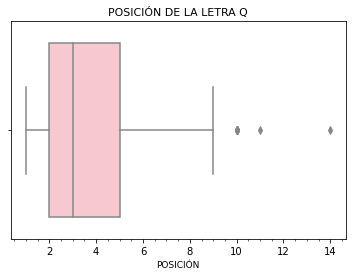

HISTOGRAMA


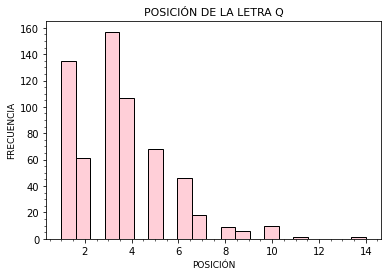

ESTIMACIÓN DE DENSIDAD DE KERNEL


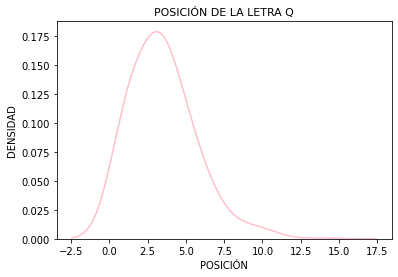

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA Q
[7, 8, 8, 8, 9, 8, 9, 9, 10, 9, 11, 11, 10, 8, 8, 10, 10, 11, 11, 12, 10, 13, 10, 11, 11, 10, 9, 8, 8, 7, 8, 10, 11, 12, 11, 14, 9, 11, 8, 9, 9, 7, 11, 12, 10, 4, 5, 5, 7, 5, 7, 8, 7, 8, 7, 10, 5, 6, 4, 7, 7, 12, 6, 9, 8, 10, 8, 11, 12, 17, 13, 12, 13, 10, 11, 12, 10, 9, 10, 10, 14, 15, 14, 15, 11, 12, 13, 8, 9, 6, 7, 6, 9, 8, 9, 8, 9, 8, 12, 13, 12, 7, 9, 6, 9, 10, 8, 7, 7, 11, 12, 8, 9, 6, 7, 11, 11, 5, 6, 6, 8, 7, 8, 7, 7, 12, 7, 14, 7, 7, 9, 11, 9, 6, 7, 11, 10, 10, 7, 9, 13, 14, 9, 11, 11, 11, 12, 14, 12, 12, 10, 12, 10, 9, 12, 13, 5, 7, 7, 9, 10, 9, 12, 12, 7, 11, 15, 13, 13, 14, 17, 8, 6, 9, 9, 5, 7, 10, 8, 11, 12, 7, 8, 10, 12, 7, 10, 13, 12, 11, 11, 15, 13, 15, 10, 8, 7, 7, 11, 11, 12, 10, 10, 11, 11, 8, 8, 9, 8, 9, 12, 13, 8, 11, 12, 10, 9, 9, 6, 7, 11, 8, 12, 11, 12, 9, 12, 10, 10, 13, 11, 9, 8, 10, 13, 9, 7, 8, 11, 11, 11, 12, 14, 8, 5, 10, 7, 7, 8, 8, 8, 9, 8, 10, 10, 9, 8, 11, 10, 8, 12, 10, 9, 7, 8, 11, 10, 11, 10, 11, 12, 6, 9, 9

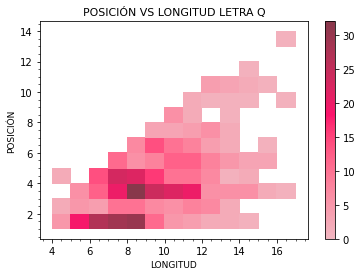

In [66]:
# Analysis for letter Q
analysis_each_letter('q')

####Letter R

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA R
MEDIDAS DE TENDENCIA CENTRAL
{'median': 5.0, 'mode': 3}
MEDIDAS DE POSICIONAMIENTO
{'q1': 3.0, 'q2': 5.0, 'q3': 6.0, 'iqr': 3.0}
MEDIDAS DE DISPERSIÓN
{'range': 15, 'variance': 6.94688482392483, 'std_dev': 2.635694372252752}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


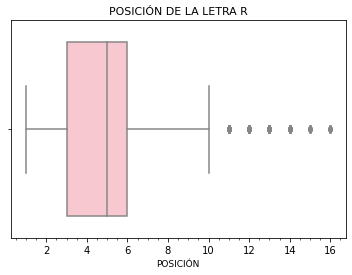

HISTOGRAMA


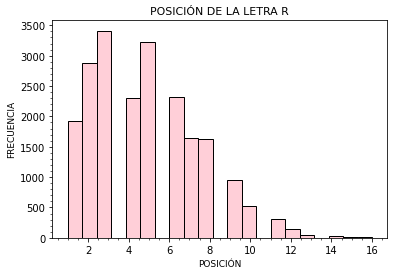

ESTIMACIÓN DE DENSIDAD DE KERNEL


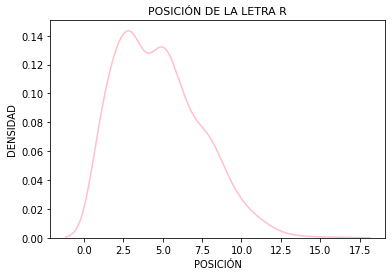

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA R
[5, 11, 9, 11, 11, 11, 13, 6, 8, 10, 11, 11, 7, 9, 7, 7, 9, 9, 6, 7, 11, 7, 8, 8, 8, 9, 9, 10, 7, 12, 8, 7, 8, 10, 10, 6, 8, 9, 6, 6, 8, 10, 8, 9, 7, 7, 7, 9, 9, 6, 8, 9, 9, 8, 8, 6, 7, 4, 6, 7, 10, 11, 6, 10, 10, 7, 9, 9, 6, 4, 13, 9, 14, 10, 9, 11, 11, 12, 12, 6, 5, 8, 10, 8, 8, 8, 8, 5, 5, 5, 5, 6, 6, 7, 7, 7, 10, 10, 15, 15, 8, 7, 7, 8, 8, 9, 10, 9, 11, 11, 8, 7, 13, 9, 10, 9, 10, 8, 8, 7, 12, 12, 6, 6, 7, 8, 8, 7, 14, 10, 7, 10, 8, 8, 7, 8, 8, 8, 7, 10, 11, 11, 8, 11, 9, 9, 10, 10, 12, 12, 10, 8, 8, 10, 10, 7, 8, 9, 7, 10, 9, 10, 9, 9, 6, 8, 12, 7, 11, 7, 7, 9, 9, 9, 9, 9, 9, 6, 5, 6, 13, 8, 9, 6, 7, 7, 10, 7, 7, 6, 6, 8, 9, 11, 9, 11, 11, 9, 9, 9, 10, 9, 10, 8, 9, 8, 9, 9, 9, 6, 6, 11, 11, 6, 7, 7, 6, 6, 10, 12, 11, 13, 13, 11, 11, 10, 10, 11, 8, 9, 10, 8, 9, 10, 8, 9, 8, 8, 5, 7, 6, 6, 7, 8, 8, 9, 9, 6, 9, 7, 8, 9, 12, 8, 6, 9, 7, 9, 9, 9, 7, 7, 8, 10, 10, 7, 8, 8, 7, 8, 10, 10, 7, 7, 8, 12, 10, 10, 7, 14, 10, 10, 14, 16, 12, 13, 12, 13, 

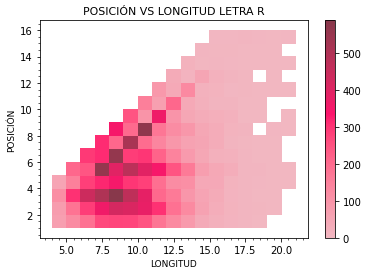

In [67]:
# Analysis for letter R
analysis_each_letter('r')

####Letter S

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA S
MEDIDAS DE TENDENCIA CENTRAL
{'median': 6, 'mode': 3}
MEDIDAS DE POSICIONAMIENTO
{'q1': 3.0, 'q2': 6.0, 'q3': 9.0, 'iqr': 6.0}
MEDIDAS DE DISPERSIÓN
{'range': 20, 'variance': 13.509810115771597, 'std_dev': 3.6755693594015604}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


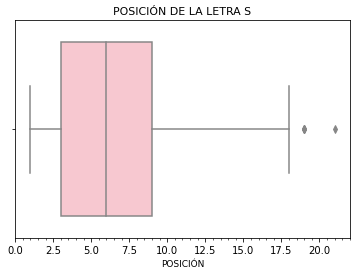

HISTOGRAMA


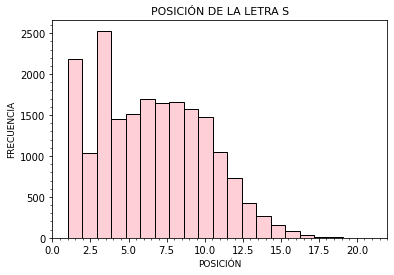

ESTIMACIÓN DE DENSIDAD DE KERNEL


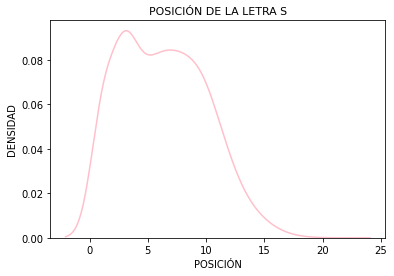

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA S
[6, 11, 11, 11, 10, 11, 7, 8, 14, 6, 11, 10, 6, 9, 6, 8, 8, 8, 6, 7, 8, 13, 13, 14, 14, 8, 8, 8, 6, 10, 9, 7, 11, 13, 10, 12, 10, 7, 8, 7, 8, 8, 13, 9, 9, 11, 11, 11, 11, 8, 9, 9, 7, 8, 8, 9, 10, 10, 9, 11, 8, 7, 10, 14, 14, 9, 11, 13, 13, 9, 10, 10, 9, 10, 10, 8, 7, 7, 7, 8, 10, 6, 8, 8, 8, 8, 5, 6, 6, 8, 9, 10, 13, 13, 10, 7, 10, 11, 5, 11, 13, 9, 6, 7, 7, 12, 10, 8, 10, 11, 11, 9, 7, 9, 12, 10, 10, 10, 9, 9, 10, 8, 11, 9, 6, 9, 10, 8, 6, 6, 9, 8, 10, 10, 11, 11, 11, 12, 10, 8, 9, 8, 15, 9, 9, 10, 10, 9, 9, 11, 8, 8, 8, 8, 6, 5, 10, 12, 11, 13, 11, 10, 9, 10, 9, 9, 5, 9, 9, 7, 11, 8, 9, 10, 10, 7, 7, 5, 4, 11, 8, 12, 9, 9, 10, 8, 9, 10, 10, 7, 8, 9, 11, 11, 8, 8, 7, 8, 8, 10, 8, 6, 5, 8, 9, 9, 6, 8, 8, 5, 10, 12, 9, 12, 9, 7, 9, 9, 11, 11, 9, 6, 7, 8, 10, 8, 10, 10, 12, 11, 9, 7, 14, 10, 5, 4, 14, 8, 10, 14, 16, 16, 12, 13, 13, 12, 13, 14, 15, 15, 13, 13, 11, 11, 14, 15, 15, 14, 15, 15, 9, 11, 9, 8, 9, 14, 12, 12, 12, 9, 9, 12, 9, 8, 11, 9, 7,

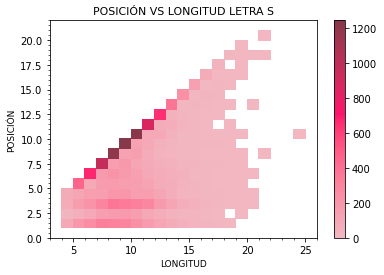

In [68]:
# Analysis for letter S
analysis_each_letter('s')

####Letter T

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA T
MEDIDAS DE TENDENCIA CENTRAL
{'median': 5.0, 'mode': 4}
MEDIDAS DE POSICIONAMIENTO
{'q1': 3.0, 'q2': 5.0, 'q3': 7.0, 'iqr': 4.0}
MEDIDAS DE DISPERSIÓN
{'range': 21, 'variance': 8.545850409447107, 'std_dev': 2.9233286523152175}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


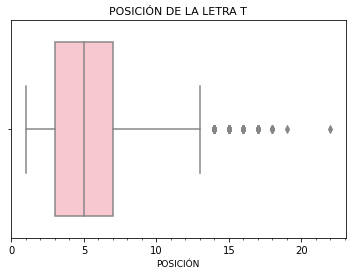

HISTOGRAMA


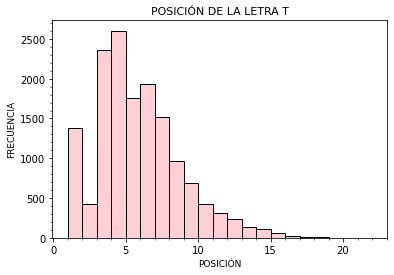

ESTIMACIÓN DE DENSIDAD DE KERNEL


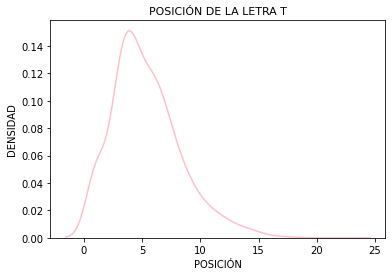

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA T
[13, 13, 8, 14, 14, 5, 7, 6, 11, 9, 10, 8, 9, 5, 7, 12, 12, 8, 7, 8, 8, 13, 14, 8, 8, 6, 7, 14, 11, 12, 15, 8, 8, 8, 13, 13, 9, 11, 11, 11, 8, 9, 7, 10, 14, 9, 11, 13, 9, 9, 10, 10, 9, 9, 10, 10, 8, 7, 9, 10, 12, 13, 14, 11, 6, 6, 7, 5, 11, 11, 10, 12, 9, 10, 10, 11, 14, 14, 6, 7, 8, 9, 6, 7, 9, 10, 10, 8, 9, 7, 6, 8, 9, 10, 10, 8, 9, 8, 9, 7, 9, 11, 7, 10, 9, 10, 9, 6, 12, 13, 13, 8, 9, 7, 10, 14, 11, 12, 11, 9, 14, 14, 15, 15, 12, 6, 7, 6, 10, 12, 11, 13, 5, 11, 11, 9, 8, 9, 10, 8, 4, 5, 9, 7, 7, 9, 9, 6, 6, 10, 11, 11, 9, 7, 9, 11, 8, 8, 9, 9, 10, 10, 6, 7, 4, 5, 7, 5, 6, 4, 5, 7, 8, 9, 11, 7, 6, 8, 10, 13, 11, 12, 9, 11, 11, 6, 8, 6, 7, 8, 8, 6, 5, 8, 9, 8, 9, 9, 10, 12, 11, 8, 9, 6, 9, 8, 10, 10, 12, 8, 8, 9, 12, 7, 9, 9, 9, 6, 6, 13, 11, 10, 11, 14, 14, 11, 8, 8, 9, 8, 10, 7, 7, 10, 14, 8, 6, 7, 14, 14, 8, 7, 8, 7, 8, 10, 14, 16, 12, 13, 12, 13, 14, 15, 13, 11, 11, 14, 14, 15, 15, 14, 14, 15, 15, 6, 7, 7, 8, 8, 8, 9, 7, 7, 9, 14, 12, 6, 9,

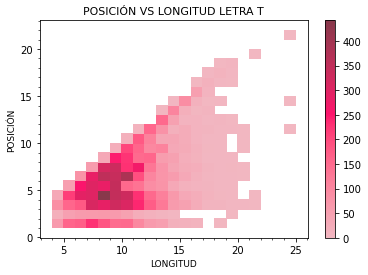

In [69]:
# Analysis for letter T
analysis_each_letter('t')

####Letter U

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA U
MEDIDAS DE TENDENCIA CENTRAL
{'median': 4.0, 'mode': 2}
MEDIDAS DE POSICIONAMIENTO
{'q1': 2.0, 'q2': 4.0, 'q3': 5.0, 'iqr': 3.0}
MEDIDAS DE DISPERSIÓN
{'range': 16, 'variance': 4.540656740337169, 'std_dev': 2.1308816814495284}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


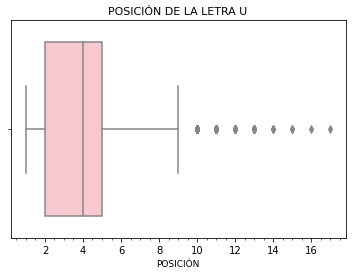

HISTOGRAMA


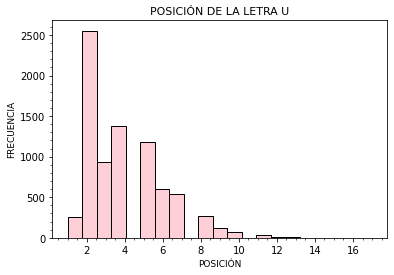

ESTIMACIÓN DE DENSIDAD DE KERNEL


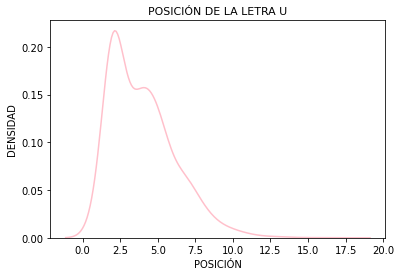

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA U
[7, 4, 9, 9, 10, 6, 8, 9, 11, 12, 7, 10, 15, 8, 7, 8, 13, 9, 11, 11, 8, 9, 7, 7, 6, 6, 7, 8, 4, 6, 9, 7, 10, 9, 10, 12, 6, 8, 8, 5, 6, 8, 10, 11, 14, 8, 9, 7, 9, 10, 10, 8, 9, 7, 8, 9, 10, 12, 11, 13, 7, 9, 6, 5, 7, 8, 9, 11, 7, 6, 8, 10, 13, 11, 12, 9, 11, 6, 8, 6, 7, 8, 8, 6, 5, 8, 9, 8, 9, 9, 9, 7, 9, 6, 6, 9, 9, 9, 10, 10, 7, 8, 9, 12, 12, 11, 11, 9, 9, 10, 10, 9, 9, 10, 10, 8, 8, 10, 10, 11, 11, 7, 8, 9, 11, 8, 7, 8, 10, 8, 6, 5, 8, 9, 6, 6, 5, 7, 8, 7, 8, 6, 5, 10, 8, 13, 9, 8, 9, 7, 7, 12, 10, 14, 8, 7, 8, 8, 8, 9, 8, 9, 9, 10, 9, 11, 11, 10, 8, 8, 10, 10, 11, 11, 4, 6, 7, 8, 9, 5, 9, 9, 5, 9, 6, 8, 9, 9, 9, 7, 6, 7, 15, 11, 13, 14, 13, 14, 10, 11, 8, 9, 9, 7, 7, 10, 10, 19, 6, 7, 8, 11, 11, 9, 8, 10, 12, 11, 11, 14, 12, 12, 6, 9, 10, 12, 9, 9, 7, 7, 9, 9, 6, 4, 8, 9, 6, 8, 8, 10, 10, 10, 9, 11, 12, 5, 14, 5, 9, 10, 5, 6, 6, 7, 8, 4, 6, 7, 9, 9, 9, 9, 8, 8, 8, 8, 10, 6, 5, 11, 6, 8, 8, 9, 9, 7, 9, 6, 7, 11, 5, 10, 13, 9, 5, 7, 10, 7, 10, 

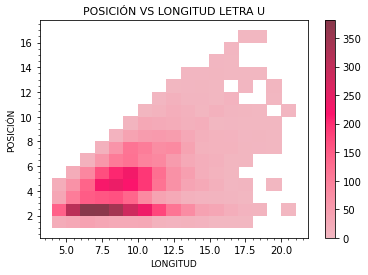

In [70]:
# Analysis for letter U
analysis_each_letter('u')

####Letter V

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA V
MEDIDAS DE TENDENCIA CENTRAL
{'median': 4, 'mode': 1}
MEDIDAS DE POSICIONAMIENTO
{'q1': 2.0, 'q2': 4.0, 'q3': 6.0, 'iqr': 4.0}
MEDIDAS DE DISPERSIÓN
{'range': 14, 'variance': 7.217565326097964, 'std_dev': 2.6865526844076526}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


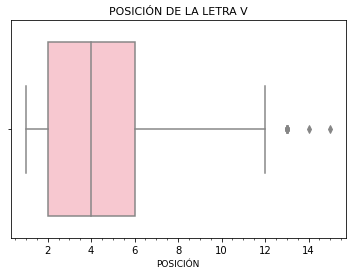

HISTOGRAMA


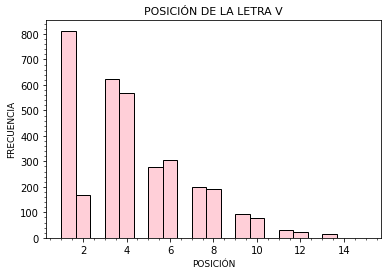

ESTIMACIÓN DE DENSIDAD DE KERNEL


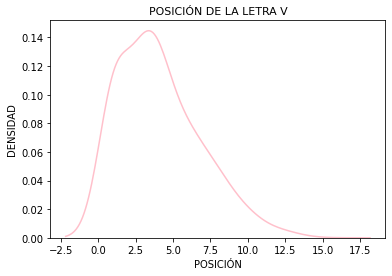

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA V
[11, 9, 10, 13, 9, 14, 10, 9, 11, 12, 7, 8, 8, 6, 7, 6, 10, 11, 9, 7, 9, 11, 8, 9, 10, 6, 7, 11, 8, 7, 11, 7, 8, 14, 15, 14, 15, 8, 11, 12, 10, 10, 11, 7, 10, 11, 8, 11, 12, 9, 8, 8, 9, 13, 11, 8, 9, 11, 8, 9, 8, 8, 9, 10, 5, 8, 8, 12, 7, 9, 9, 9, 6, 8, 9, 8, 17, 7, 8, 7, 6, 7, 7, 11, 16, 12, 11, 12, 6, 7, 9, 7, 9, 4, 7, 6, 12, 11, 10, 11, 9, 8, 14, 11, 12, 15, 7, 9, 10, 9, 11, 12, 11, 12, 15, 16, 10, 12, 10, 12, 12, 9, 17, 10, 7, 7, 8, 6, 11, 6, 7, 9, 9, 10, 10, 11, 11, 9, 11, 8, 9, 10, 10, 7, 10, 13, 9, 12, 9, 11, 13, 15, 16, 15, 16, 14, 8, 5, 6, 7, 5, 6, 9, 8, 13, 9, 8, 9, 7, 9, 7, 9, 6, 6, 6, 6, 8, 10, 5, 7, 8, 9, 9, 8, 11, 6, 9, 9, 8, 6, 8, 8, 5, 4, 8, 9, 6, 7, 7, 5, 10, 5, 7, 5, 7, 8, 6, 5, 6, 9, 4, 4, 11, 11, 12, 12, 8, 8, 8, 4, 6, 7, 6, 9, 7, 5, 7, 5, 8, 9, 13, 6, 8, 11, 9, 11, 5, 10, 10, 13, 12, 10, 11, 12, 11, 7, 7, 9, 12, 6, 7, 6, 6, 6, 11, 5, 10, 6, 9, 8, 8, 12, 7, 12, 7, 9, 19, 6, 9, 12, 10, 10, 11, 7, 5, 6, 10, 9, 10, 14, 16, 8, 10

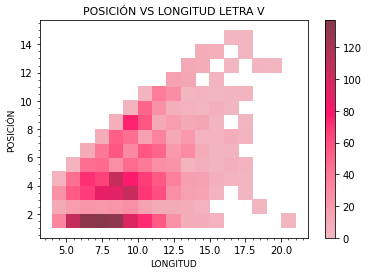

In [71]:
# Analysis for letter V
analysis_each_letter('v')

####Letter W

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA W
MEDIDAS DE TENDENCIA CENTRAL
{'median': 3, 'mode': 1}
MEDIDAS DE POSICIONAMIENTO
{'q1': 1.0, 'q2': 3.0, 'q3': 5.0, 'iqr': 4.0}
MEDIDAS DE DISPERSIÓN
{'range': 11, 'variance': 4.853260869565218, 'std_dev': 2.203011772452707}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


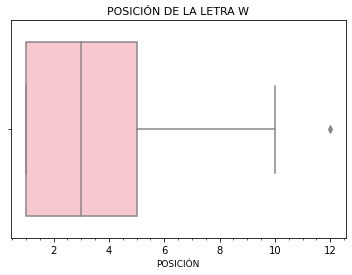

HISTOGRAMA


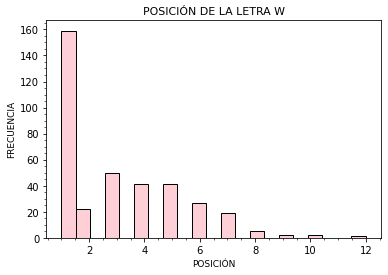

ESTIMACIÓN DE DENSIDAD DE KERNEL


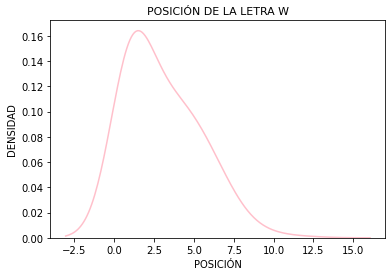

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA W
[7, 10, 6, 7, 10, 5, 6, 9, 6, 5, 9, 7, 5, 4, 9, 6, 8, 9, 7, 5, 6, 8, 9, 10, 9, 10, 8, 12, 8, 12, 8, 5, 6, 8, 8, 4, 11, 6, 10, 11, 7, 5, 4, 6, 9, 6, 5, 10, 8, 5, 5, 7, 4, 6, 8, 5, 8, 15, 7, 7, 9, 9, 6, 8, 8, 6, 7, 5, 8, 8, 9, 7, 5, 6, 9, 8, 9, 8, 9, 6, 8, 8, 8, 8, 7, 5, 9, 6, 7, 9, 9, 7, 4, 9, 8, 7, 17, 8, 6, 9, 5, 7, 7, 4, 8, 4, 6, 5, 5, 10, 13, 9, 10, 5, 6, 9, 9, 6, 10, 7, 8, 7, 10, 6, 9, 5, 7, 6, 6, 12, 7, 4, 6, 10, 13, 7, 6, 6, 6, 8, 8, 8, 5, 5, 7, 7, 7, 9, 5, 10, 8, 4, 7, 8, 7, 10, 8, 18, 10, 6, 4, 8, 4, 7, 4, 12, 7, 7, 9, 8, 9, 9, 9, 5, 10, 7, 7, 8, 5, 7, 5, 4, 6, 7, 7, 5, 9, 9, 6, 6, 6, 8, 5, 5, 9, 10, 8, 11, 6, 6, 8, 4, 4, 5, 7, 8, 9, 5, 5, 6, 6, 6, 4, 7, 6, 8, 4, 6, 7, 10, 10, 4, 7, 7, 6, 12, 4, 6, 6, 7, 11, 4, 9, 10, 8, 10, 5, 5, 9, 9, 6, 4, 5, 5, 6, 5, 7, 7, 5, 5, 11, 7, 9, 6, 7, 6, 5, 5, 8, 6, 10, 5, 5, 6, 6, 7, 7, 5, 6, 10, 7, 5, 8, 11, 4, 10, 7, 9, 12, 11, 6, 5, 7, 8, 7, 7, 5, 9, 9, 8, 7, 7, 9, 7, 9, 9, 4, 7, 9, 8, 6, 9, 9, 9, 5, 8,

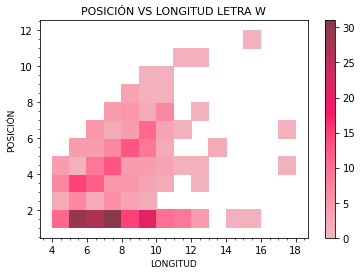

In [72]:
# Analysis for letter W
analysis_each_letter('w')

####Letter X

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA X
MEDIDAS DE TENDENCIA CENTRAL
{'median': 2, 'mode': 2}
MEDIDAS DE POSICIONAMIENTO
{'q1': 2.0, 'q2': 2.0, 'q3': 3.0, 'iqr': 1.0}
MEDIDAS DE DISPERSIÓN
{'range': 11, 'variance': 2.415747761478377, 'std_dev': 1.5542675964834296}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


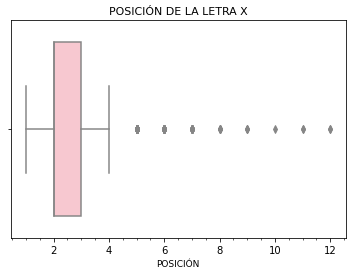

HISTOGRAMA


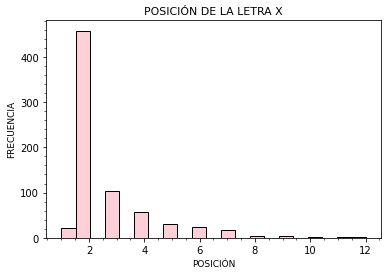

ESTIMACIÓN DE DENSIDAD DE KERNEL


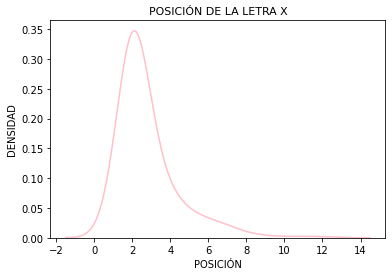

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA X
[4, 9, 14, 9, 10, 10, 7, 11, 10, 7, 6, 7, 10, 11, 11, 11, 9, 8, 5, 12, 13, 13, 8, 10, 12, 14, 10, 15, 10, 9, 11, 8, 7, 11, 13, 14, 14, 10, 7, 9, 8, 6, 9, 6, 7, 10, 5, 7, 7, 9, 7, 7, 7, 8, 5, 6, 5, 12, 12, 10, 8, 10, 8, 9, 10, 10, 9, 5, 11, 9, 7, 8, 5, 10, 8, 6, 11, 7, 9, 6, 7, 9, 6, 8, 8, 7, 8, 6, 8, 7, 9, 10, 8, 8, 9, 7, 8, 9, 10, 12, 8, 9, 8, 7, 6, 6, 9, 10, 10, 9, 10, 7, 8, 10, 10, 9, 11, 13, 16, 11, 7, 8, 11, 11, 13, 8, 13, 9, 8, 9, 6, 8, 8, 9, 8, 7, 7, 7, 8, 9, 8, 9, 7, 9, 9, 14, 10, 12, 9, 10, 7, 8, 10, 10, 11, 10, 7, 10, 14, 12, 9, 10, 11, 6, 9, 9, 10, 6, 7, 7, 8, 6, 12, 13, 10, 10, 10, 12, 8, 10, 10, 7, 7, 11, 5, 6, 9, 10, 9, 6, 7, 9, 9, 9, 6, 6, 7, 8, 6, 11, 6, 7, 6, 7, 10, 13, 15, 9, 10, 7, 8, 8, 10, 9, 10, 7, 7, 9, 10, 5, 6, 7, 12, 8, 7, 8, 9, 5, 10, 7, 7, 9, 8, 8, 8, 11, 5, 8, 9, 10, 11, 8, 8, 10, 9, 11, 13, 13, 14, 9, 11, 12, 10, 14, 12, 10, 11, 9, 8, 11, 12, 10, 11, 13, 14, 15, 15, 13, 14, 12, 14, 12, 12, 13, 15, 14, 11, 11, 12, 7,

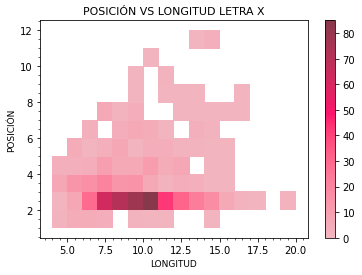

In [73]:
# Analysis for letter X
analysis_each_letter('x')

####Letter Y

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA Y
MEDIDAS DE TENDENCIA CENTRAL
{'median': 5.0, 'mode': 3}
MEDIDAS DE POSICIONAMIENTO
{'q1': 3.0, 'q2': 5.0, 'q3': 6.0, 'iqr': 3.0}
MEDIDAS DE DISPERSIÓN
{'range': 13, 'variance': 5.796168651509683, 'std_dev': 2.407523343917912}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


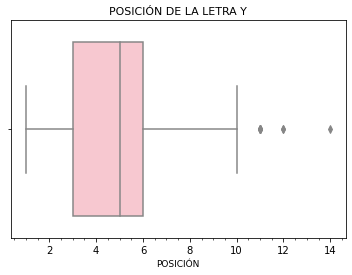

HISTOGRAMA


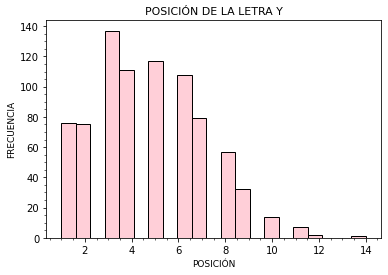

ESTIMACIÓN DE DENSIDAD DE KERNEL


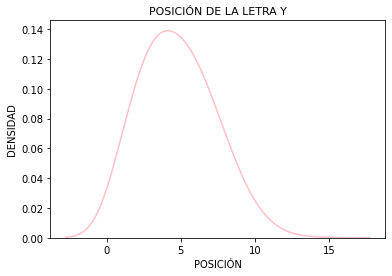

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA Y
[5, 7, 5, 14, 9, 10, 15, 8, 10, 10, 7, 5, 5, 9, 7, 6, 4, 8, 7, 13, 6, 5, 7, 8, 7, 8, 7, 8, 6, 8, 10, 6, 8, 8, 8, 5, 6, 7, 7, 7, 6, 7, 6, 4, 6, 6, 4, 9, 8, 9, 13, 13, 8, 5, 9, 8, 5, 7, 4, 6, 5, 7, 8, 7, 8, 6, 8, 10, 8, 9, 6, 8, 9, 8, 9, 8, 6, 5, 5, 5, 6, 12, 10, 4, 7, 8, 8, 6, 5, 5, 5, 5, 5, 8, 5, 7, 5, 5, 10, 9, 12, 9, 5, 6, 5, 4, 8, 7, 7, 8, 5, 6, 7, 4, 6, 7, 4, 10, 7, 9, 9, 10, 5, 10, 12, 5, 5, 7, 7, 6, 7, 4, 6, 7, 7, 9, 9, 7, 4, 8, 4, 5, 5, 8, 10, 11, 6, 9, 9, 7, 8, 11, 11, 12, 8, 9, 11, 11, 10, 11, 10, 11, 13, 13, 14, 12, 13, 10, 9, 9, 10, 12, 12, 9, 10, 11, 13, 13, 13, 10, 6, 8, 8, 7, 7, 8, 15, 8, 8, 9, 5, 7, 8, 14, 5, 4, 5, 4, 5, 6, 5, 6, 5, 5, 5, 10, 7, 7, 8, 6, 8, 8, 5, 8, 9, 9, 12, 8, 9, 11, 11, 8, 5, 4, 10, 7, 7, 9, 9, 9, 9, 10, 12, 12, 9, 6, 12, 12, 10, 10, 11, 13, 9, 7, 5, 6, 7, 6, 11, 6, 5, 4, 9, 4, 14, 6, 5, 13, 12, 12, 8, 6, 7, 7, 8, 6, 7, 8, 10, 10, 11, 10, 7, 8, 7, 6, 7, 5, 7, 5, 5, 7, 5, 5, 6, 8, 4, 6, 5, 9, 6, 7, 5, 7, 4, 6, 4

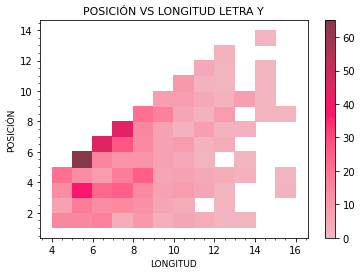

In [74]:
# Analysis for letter Y
analysis_each_letter('y')

####Letter Z

DISTRIBUCIÓN DE POSICIÓN DE LA LETRA Z
MEDIDAS DE TENDENCIA CENTRAL
{'median': 6.0, 'mode': 7}
MEDIDAS DE POSICIONAMIENTO
{'q1': 4.0, 'q2': 6.0, 'q3': 8.0, 'iqr': 4.0}
MEDIDAS DE DISPERSIÓN
{'range': 14, 'variance': 6.940055416136888, 'std_dev': 2.6343984922818504}
DIAGRAMA DE CAJA Y BIGOTES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


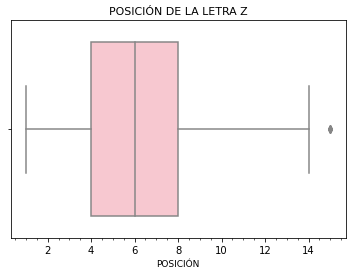

HISTOGRAMA


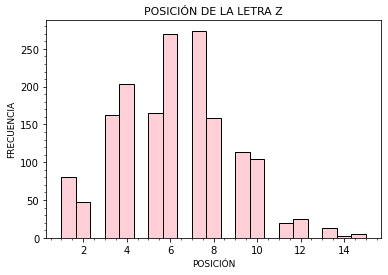

ESTIMACIÓN DE DENSIDAD DE KERNEL


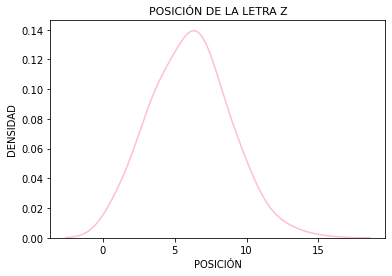

DISTRIBUCIÓN DE LONGITUD PARA LA LETRA Z
[6, 10, 7, 9, 6, 7, 6, 9, 10, 9, 10, 6, 13, 11, 12, 9, 8, 7, 8, 7, 13, 10, 8, 9, 10, 7, 7, 7, 8, 7, 9, 10, 9, 10, 9, 10, 8, 10, 8, 9, 10, 10, 11, 10, 10, 10, 10, 7, 8, 14, 14, 7, 8, 8, 6, 7, 7, 4, 7, 9, 8, 8, 9, 7, 9, 10, 9, 10, 9, 12, 12, 10, 10, 8, 8, 7, 7, 12, 10, 8, 7, 7, 7, 9, 9, 10, 8, 10, 10, 7, 9, 10, 8, 9, 9, 17, 8, 11, 5, 6, 6, 8, 8, 11, 8, 6, 10, 11, 6, 6, 9, 5, 7, 12, 10, 11, 5, 8, 11, 9, 10, 9, 12, 12, 12, 10, 11, 9, 9, 11, 5, 9, 14, 10, 8, 12, 14, 10, 10, 11, 9, 11, 9, 8, 6, 9, 8, 13, 9, 8, 9, 7, 9, 7, 9, 6, 11, 5, 7, 6, 4, 6, 7, 10, 6, 8, 8, 6, 7, 6, 9, 10, 8, 8, 8, 6, 5, 4, 8, 8, 6, 5, 6, 6, 8, 10, 7, 12, 13, 13, 7, 9, 9, 10, 8, 8, 7, 5, 5, 6, 7, 6, 7, 8, 6, 8, 4, 8, 9, 10, 9, 10, 8, 5, 10, 8, 7, 7, 7, 10, 6, 5, 6, 11, 11, 6, 8, 7, 7, 5, 6, 7, 12, 9, 5, 8, 9, 8, 6, 7, 7, 9, 8, 12, 11, 8, 5, 14, 11, 13, 14, 17, 14, 13, 14, 12, 12, 14, 14, 11, 4, 14, 11, 9, 14, 12, 13, 13, 4, 15, 10, 9, 9, 6, 7, 5, 5, 14, 5, 8, 8, 7, 7, 12, 6, 7, 7

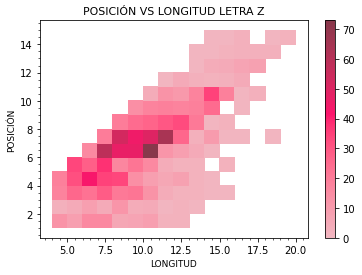

In [75]:
# Analysis for letter Z
analysis_each_letter('z')

###Hypothesis Testing

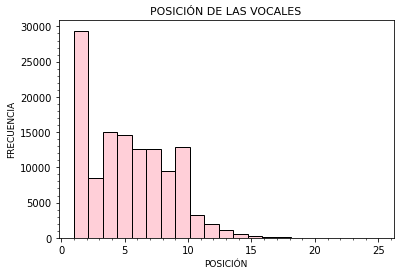

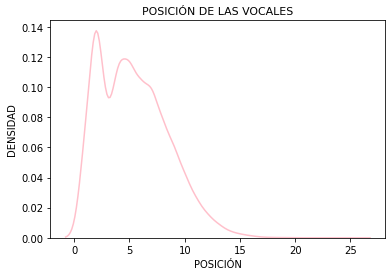

13.0


In [76]:
# Vowels Analysis
# Measures of position of the vowels
vowels_mop = measures_of_position(vowels_pos_distribution,'numeric')
# Histogram of the position of the vowels
vowels_hist = histogram(vowels_pos_distribution, 'numeric', None,'POSICIÓN DE LAS VOCALES','POSICIÓN')
# KDE of the position of the vowels
vowels_kde = KDE(vowels_pos_distribution,'numeric',None, 'POSICIÓN DE LAS VOCALES', 'POSICIÓN')
# Limit of the vowels
vowels_limit = vowels_mop['q3']+(1.5*vowels_mop['iqr'])
print(vowels_limit)

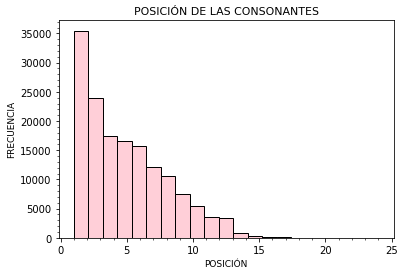

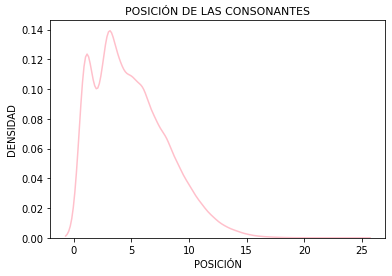

13.0


In [77]:
# Consonants Analysis
# Measures of position
consonants_mop = measures_of_position(consonants_pos_distribution,'numeric')
# Histogram of the position of the consonants
consonants_hist = histogram(consonants_pos_distribution, 'numeric', None,'POSICIÓN DE LAS CONSONANTES','POSICIÓN')
# KDE of the position of the consonants
consonants_kde = KDE(consonants_pos_distribution,'numeric',None, 'POSICIÓN DE LAS CONSONANTES', 'POSICIÓN')
# Limit of the consonants
consonants_limit = consonants_mop['q3']+(1.5*consonants_mop['iqr'])
print(consonants_limit)

In [78]:
# Getting distributions without outliers
# Vowels
vowels_wo_outliers = [x for x in vowels_pos_distribution if x <= vowels_limit]
print(len(vowels_wo_outliers))
# Consonants
consonants_wo_outliers = [x for x in consonants_pos_distribution if x <= consonants_limit]
print(len(consonants_wo_outliers))

121536
151692


In [79]:
# Getting contingnecy table
dict_type = {'VOCAL':vowels_wo_outliers, 'CONSONANTE':consonants_wo_outliers}
# print(dict_type)
df_contingency = pd.DataFrame()
df_contingency['POSITION'] = vowels_wo_outliers + consonants_wo_outliers
# Getting the type for each position
types=[]
for key,value in dict_type.items():
  for position in value:
    types.append(key)
df_contingency['TIPO']= types
# Contingency table
contingency = pd.crosstab(df_contingency['TIPO'],df_contingency['POSITION'])
display(contingency)

POSITION,1,2,3,4,5,6,7,8,9,10,11,12,13
TIPO,,,,,,,,,,,,,
CONSONANTE,23817,11651,23883,17373,16582,15797,12140,10508,7550,5416,3554,2185,1236
VOCAL,8613,20779,8547,15057,14564,12623,12593,9539,7624,5223,3264,1965,1145


In [80]:
# Hypothesis testing 1
# Alpha = 0.05
chi2, p, dof, freq = stats.chi2_contingency(contingency)
print('El valor P es ', p)

El valor P es  0.0


###Correlation Analysis

In [81]:
# Create data frame
df_correlation = pd.DataFrame(list(zip(words_lenght, number_of_vowels, number_of_consonants)), columns=['LONGITUD','N° DE VOCALES', 'N° DE CONSONANTES'], index = word_bank)
display(df_correlation)

,LONGITUD,N° DE VOCALES,N° DE CONSONANTES
aachen,6,3,3
aaron,5,3,2
abad,4,2,2
abadan,6,3,3
abades,6,3,3
...,...,...,...
zuñiga,6,3,3
zygmunt,7,1,6
zyklon,6,1,5
ñame,4,2,2


<function matplotlib.pyplot.show>

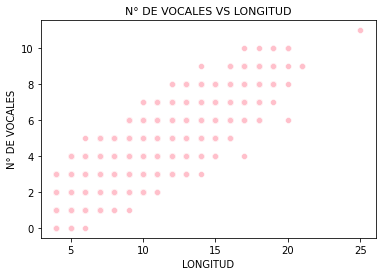

In [82]:
# Dispersion lenght vs number of vowels
num_vowels_scatter = sns.scatterplot(x=df_correlation['LONGITUD'], y= df_correlation['N° DE VOCALES'], color='Pink')
num_vowels_scatter.set_title('N° DE VOCALES VS LONGITUD', fontsize = 11)
plt.show

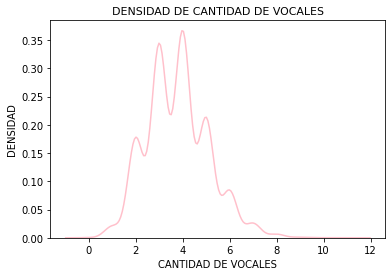

In [83]:
# KDE Vowels
num_vowels_kde = KDE(df_correlation['N° DE VOCALES'], 'numeric', None,'DENSIDAD DE CANTIDAD DE VOCALES','CANTIDAD DE VOCALES')
plt.show()

<function matplotlib.pyplot.show>

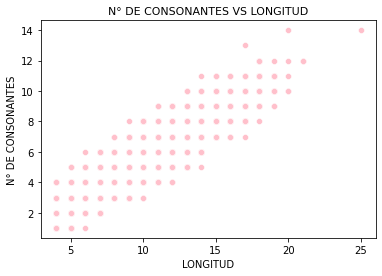

In [84]:
# Dispersion lenght vs number of consonants
num_consonants_scatter = sns.scatterplot(x=df_correlation['LONGITUD'], y= df_correlation['N° DE CONSONANTES'], color='Pink')
num_consonants_scatter.set_title('N° DE CONSONANTES VS LONGITUD', fontsize = 11)
plt.show

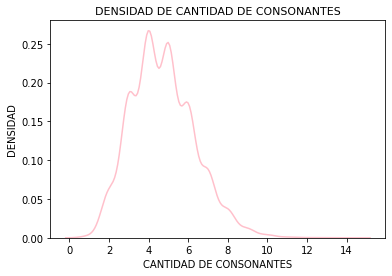

In [85]:
# KDE Vowels
num_vowels_kde = KDE(df_correlation['N° DE CONSONANTES'], 'numeric', None,'DENSIDAD DE CANTIDAD DE CONSONANTES','CANTIDAD DE CONSONANTES')
plt.show()

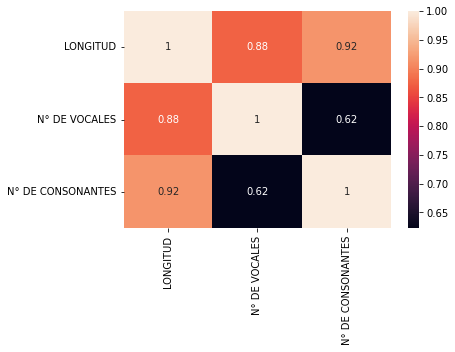

In [86]:
# Correlation
corr_heatmap = sns.heatmap(df_correlation.corr(method='spearman'), annot = True, color = 'Pink')
plt.show()